# Data Processing
+ 17 features, 8950 samples

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.style as ms
ms.use('default')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False


In [55]:
def get_droped_data(path):
    data=pd.read_csv("CC GENERAL.csv")
    data=data.dropna(how='any')
    data=data.drop(["CUST_ID","PURCHASES","PURCHASES_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX"],axis=1) # 0是每一列中的每一行进行操作，1是每一行的每一列进行操作
    return data
# 读取数据
data=pd.read_csv("CC GENERAL.csv")
data


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [57]:
# 去除有缺失的值
data[data.isnull().values==True]
data=data.dropna(how='any')
data[data.isnull().values==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [58]:
# 去除重复值
data[data.duplicated().values==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [59]:
# 数据描述
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [60]:
# 去除多余的列
data=data.drop(["CUST_ID","PURCHASES","PURCHASES_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX"],axis=1) # 0是每一列中的每一行进行操作，1是每一行的每一列进行操作
data

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0.000000,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0.000000,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.000000,0.583333,0.000000,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,0.00,0.000000,0.166667,0.000000,0.000000,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,0.00,291.12,0.000000,0.000000,0.833333,0.000000,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,0.00,144.40,0.000000,0.000000,0.666667,0.000000,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,500.0,52.549959,55.755628,0.250000,6


<IPython.core.display.Javascript object>

d:\vscode\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


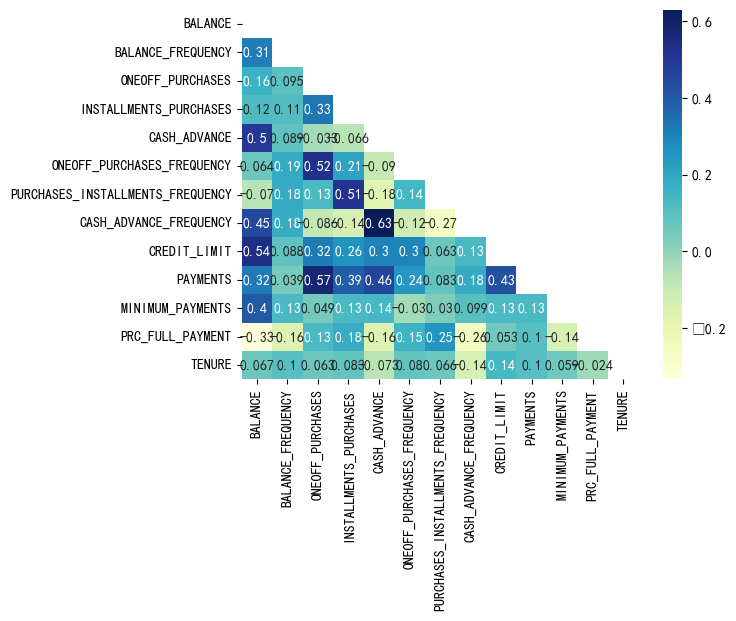

In [61]:
data.corr
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=np.triu(data.corr()))

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


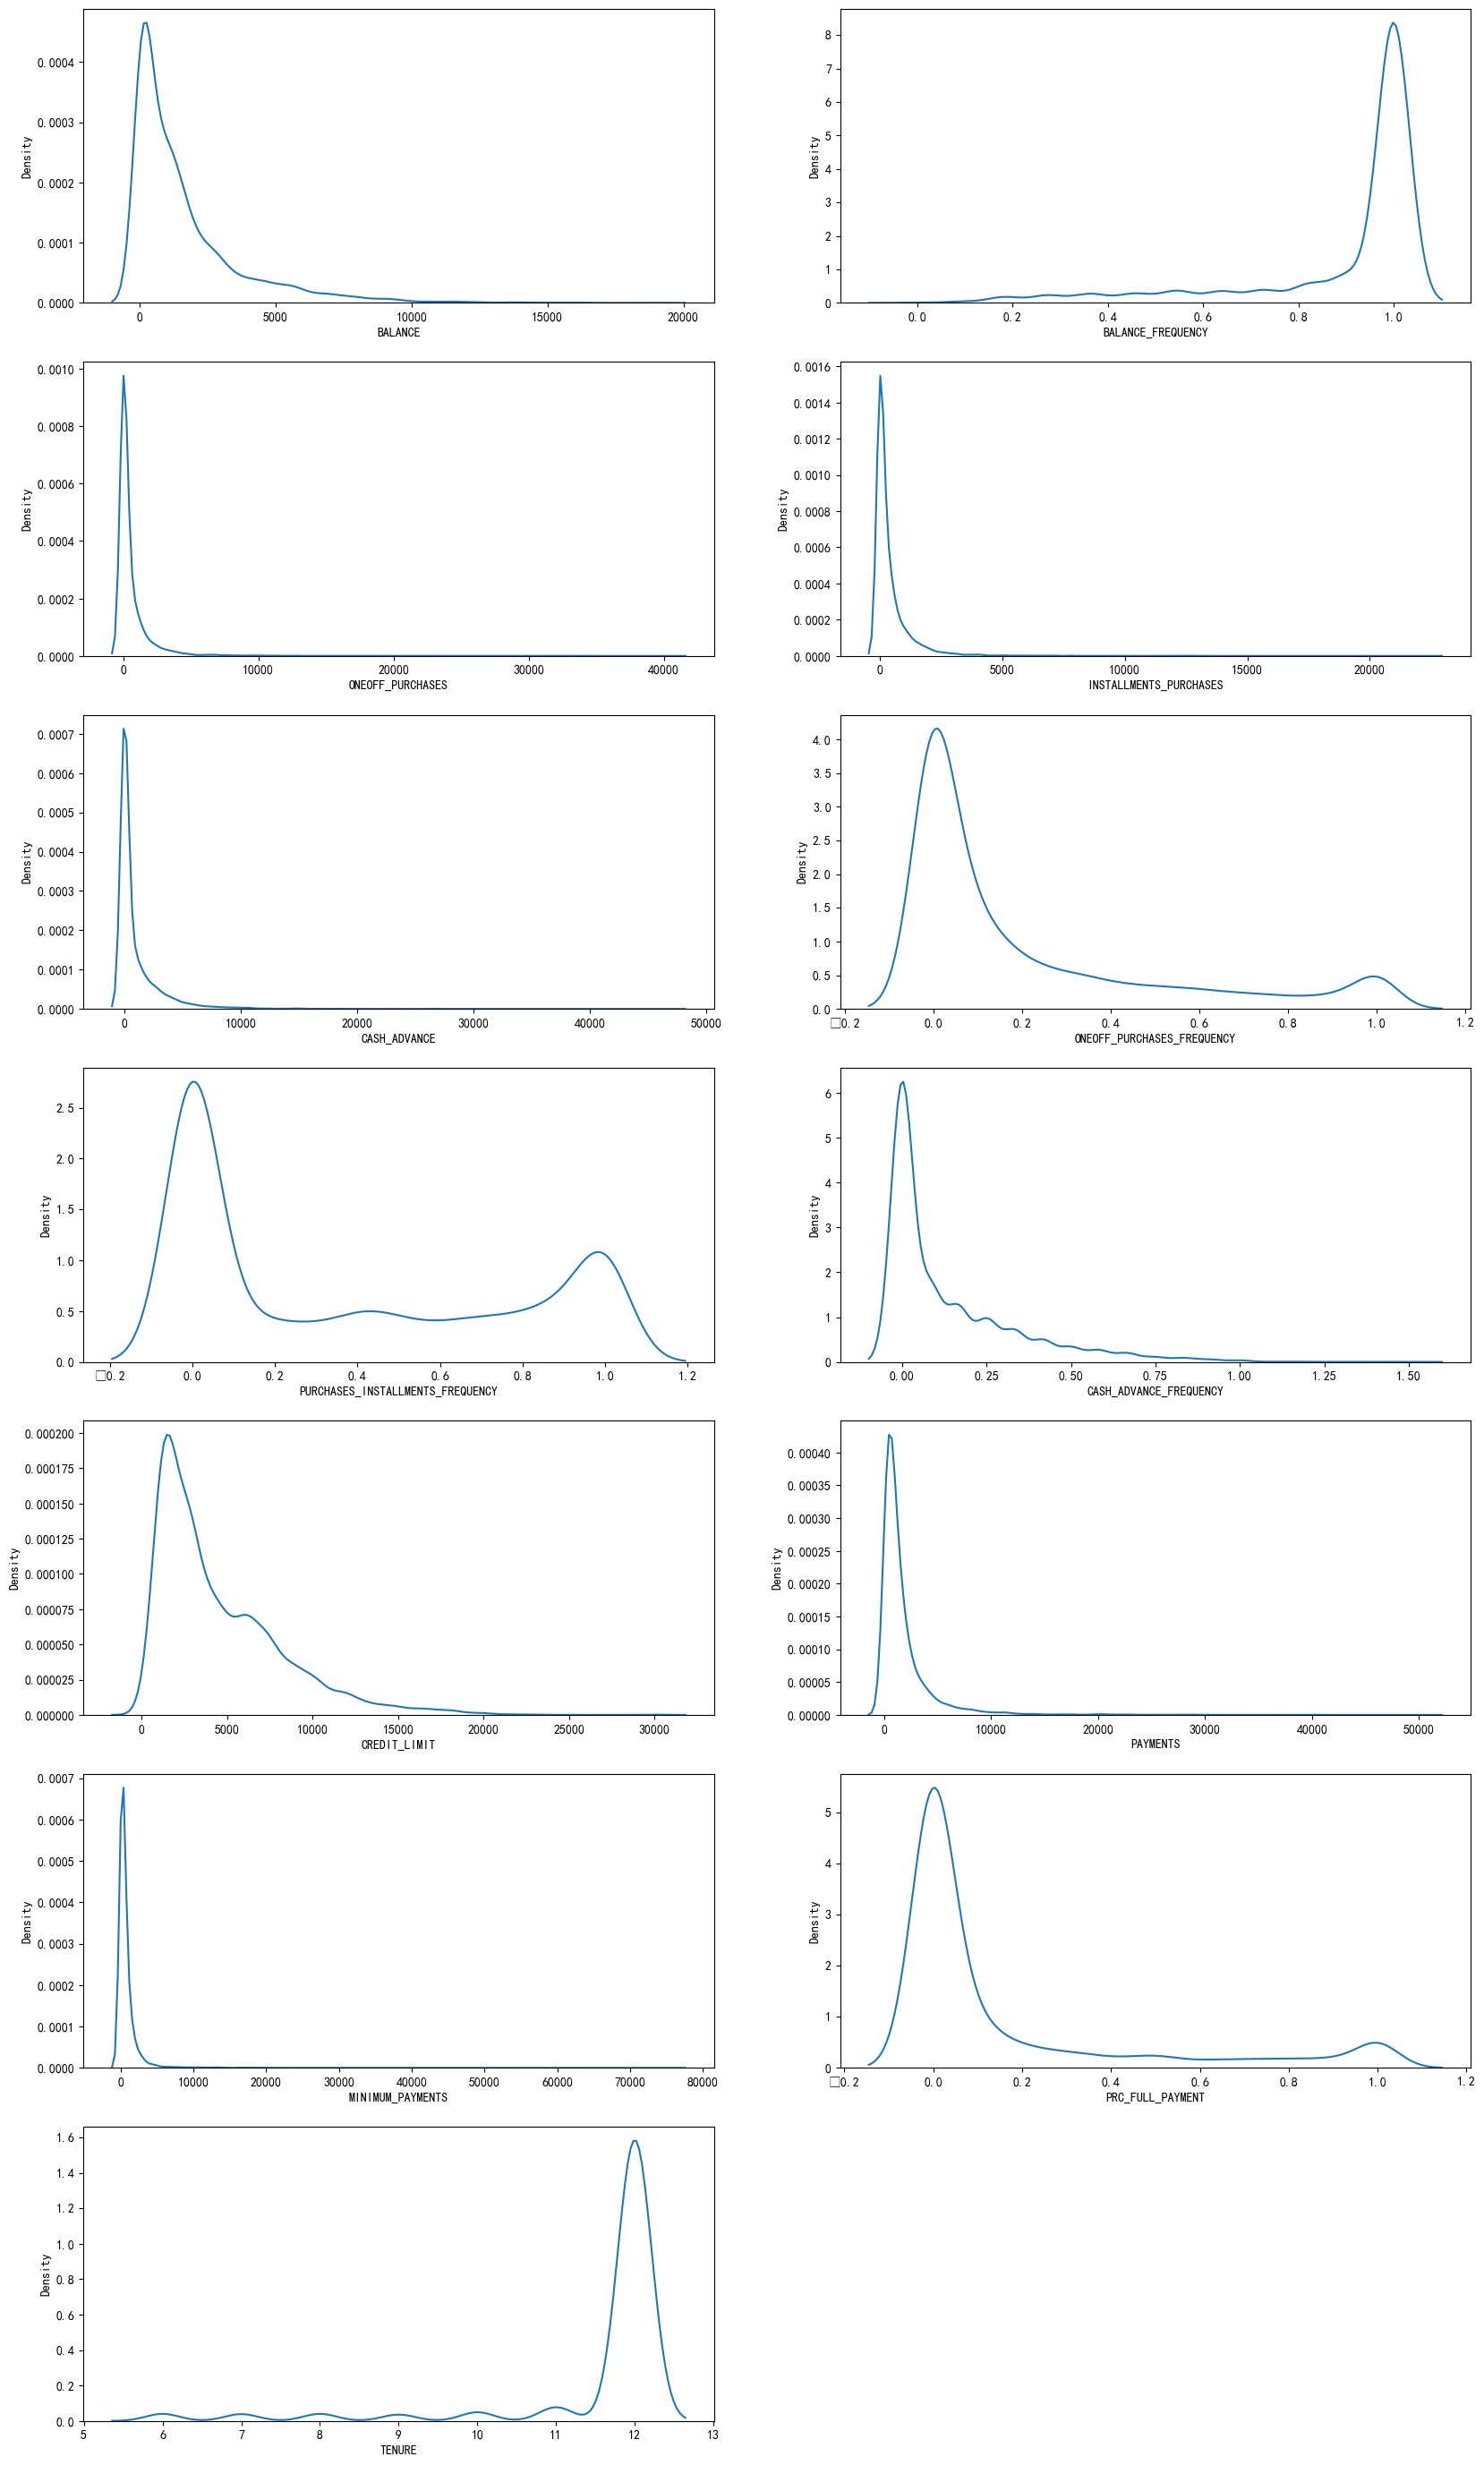

In [62]:
# visualization
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(7, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


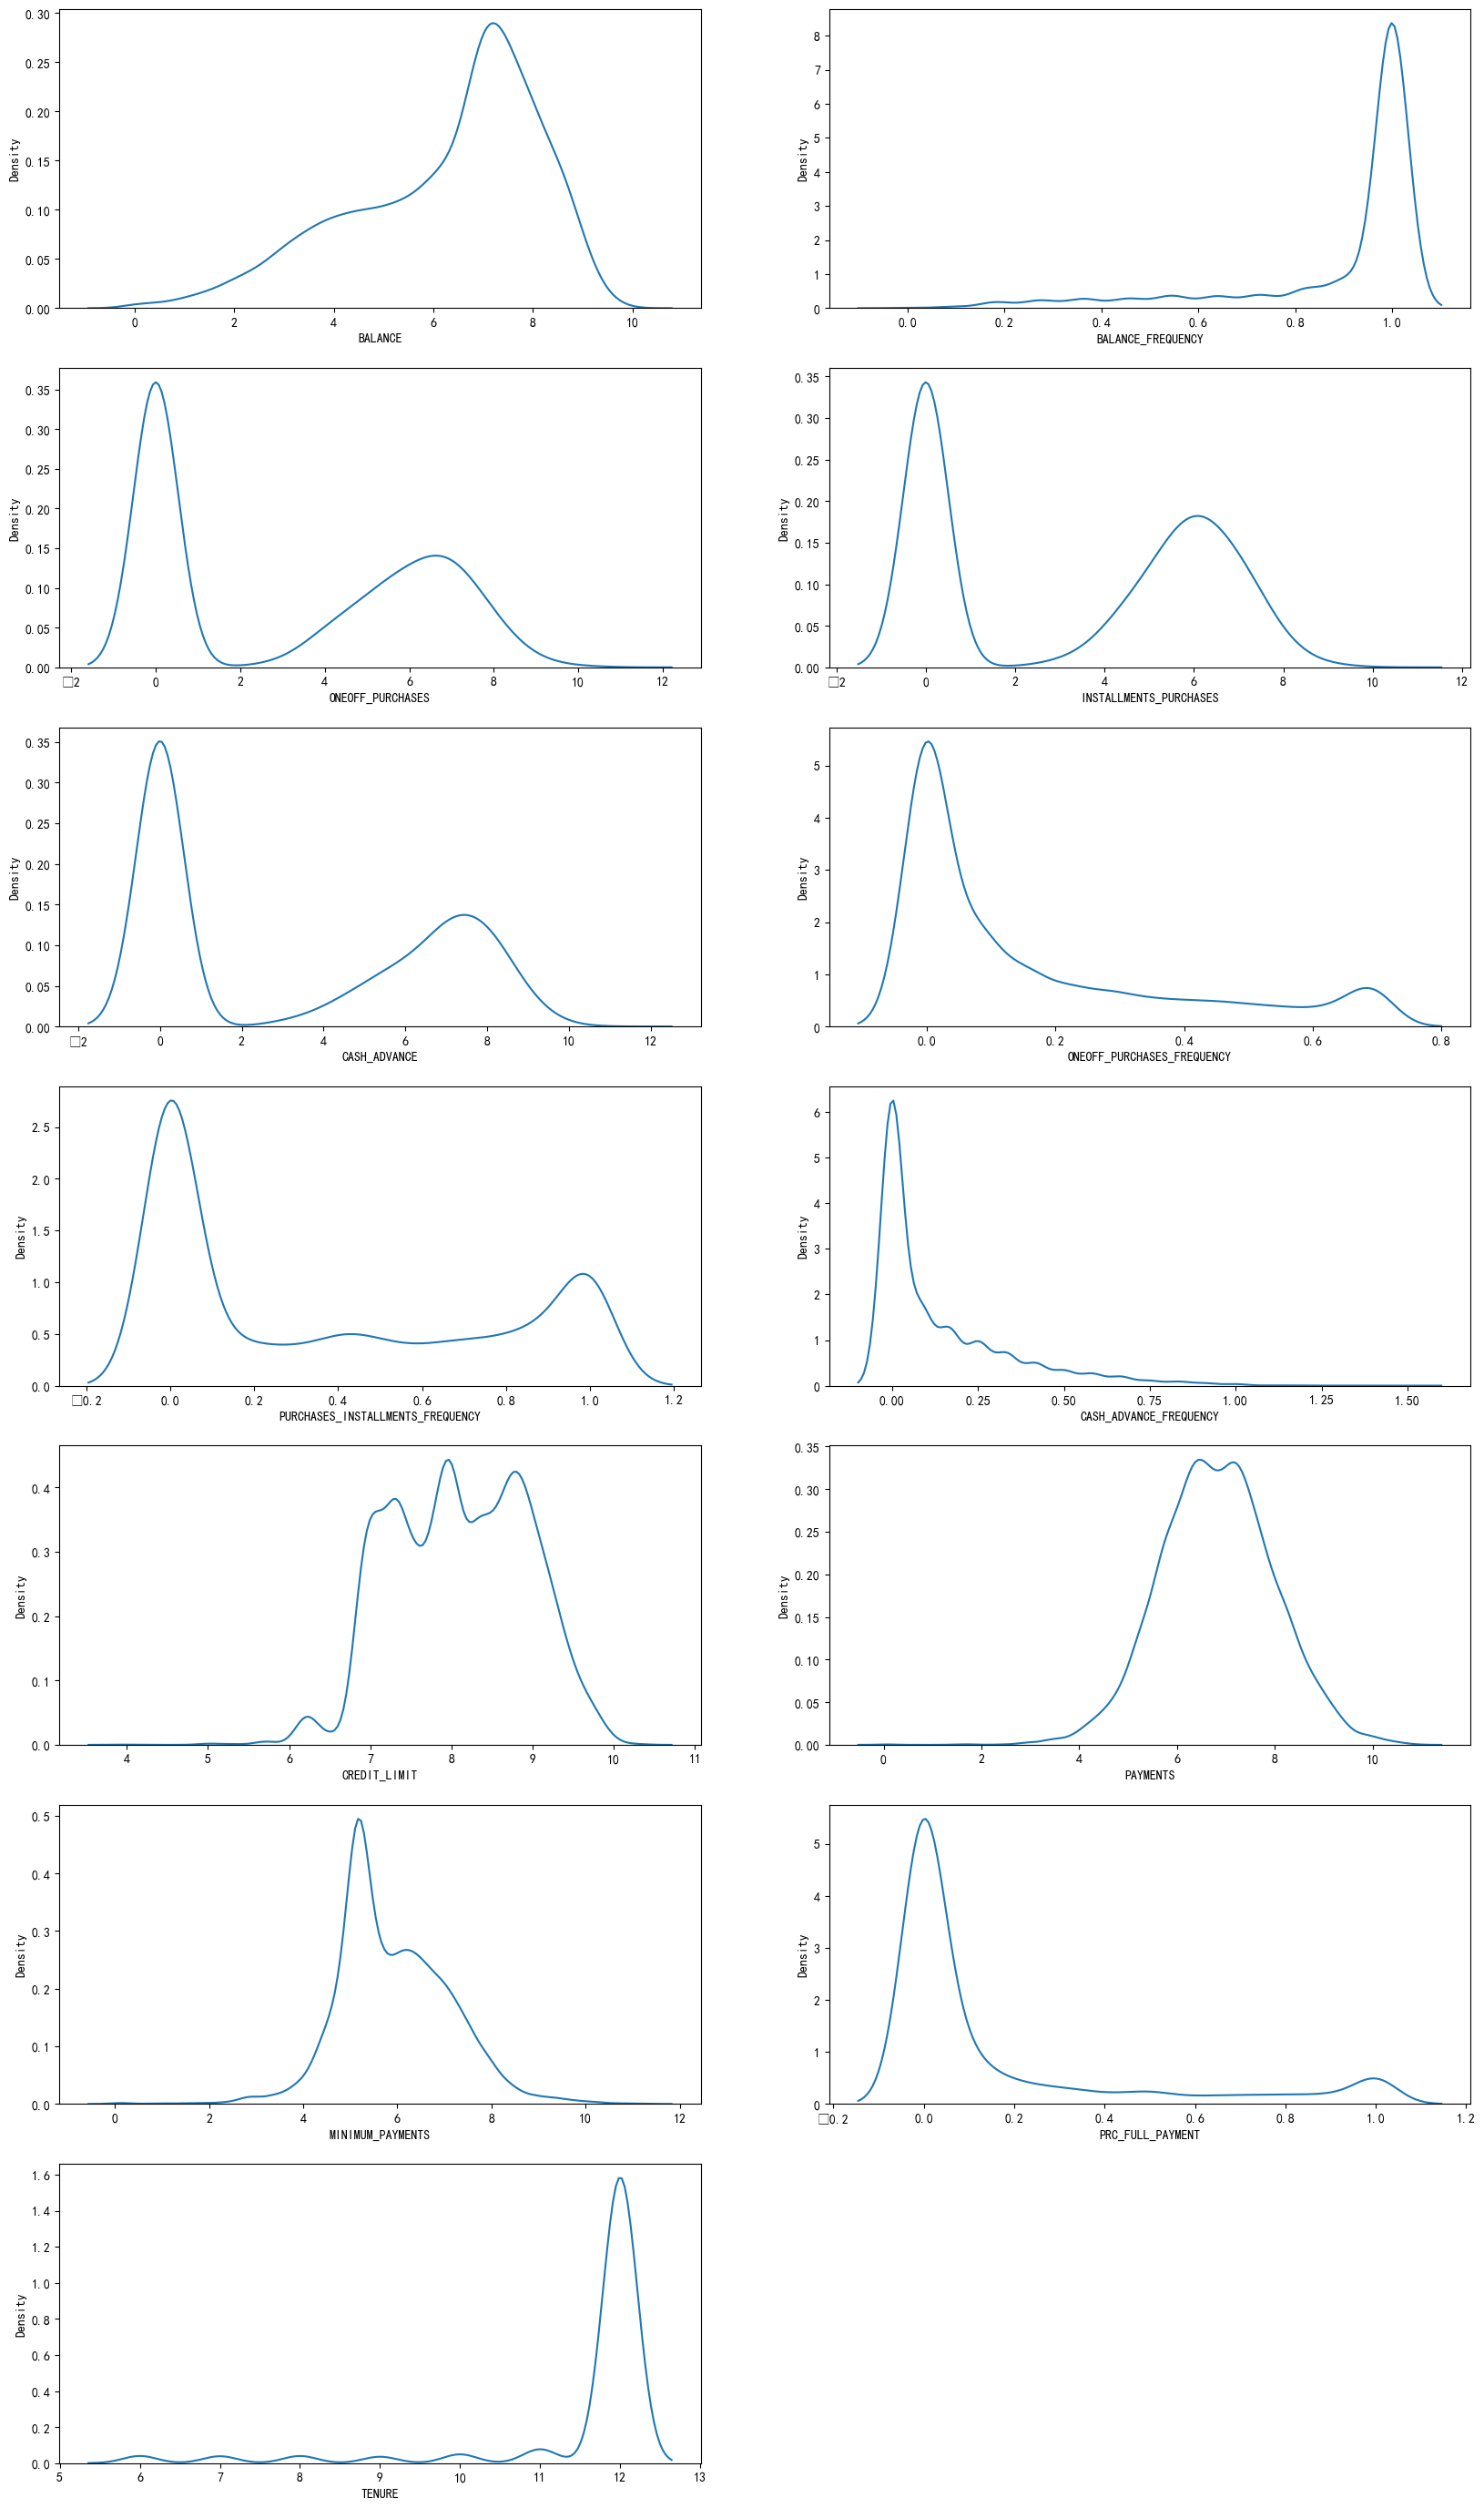

In [63]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
# Eliminate an order of magnitude impact
for col in cols:
    data[col] = np.log(1 + data[col])
    
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(7, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        


In [64]:
# 标准化
from sklearn.preprocessing import Normalizer
# std_scl = StandardScaler()
# std_values=std_scl.fit_transform(pre_values)
# std_values.shape

nm_scl=Normalizer()
X=nm_scl.fit_transform(data)
# data
X.shape

(8636, 13)

# Plotting function

In [65]:
def red_dim_plot2(red_model,data):
    """dimensional reduction and plot"""
    trans_data=red_model.fit_transform(data)
    fig,ax=plt.subplots()
    fig.set_facecolor('w')
    ax.scatter(trans_data[:,0],trans_data[:,1],alpha=0.5)
    return trans_data
    
def dbscan_clst_plot2(eps,min_samples,trans_data):
    """DBSCAN clustering and plot """
    dbscan_model=DBSCAN(eps=eps,min_samples=min_samples,n_jobs=-1)
    labels=dbscan_model.fit_predict(trans_data)
    fig1,ax1=plt.subplots()
    fig1.set_facecolor('w')
    ax1.scatter(trans_data[:,0],trans_data[:,1],c=labels,alpha=0.5)
    return dbscan_model

def kmeans_clst_plot2(trans_data):
    """K-means clustering and plot """
    from sklearn.cluster import KMeans
    from yellowbrick.cluster import KElbowVisualizer
    # elbow method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10),dpi=200)
    visualizer.fit(trans_data)
    visualizer.show()
    # clustering and plot
    model=KMeans(n_clusters=visualizer.elbow_value_)
    labels=model.fit_predict(trans_data)
    fig1,ax1=plt.subplots()
    fig1.set_facecolor('w')
    ax1.scatter(trans_data[:,0],trans_data[:,1],c=labels,alpha=0.5)
    return model
    



# PCA

<IPython.core.display.Javascript object>

0.7226539462411155

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


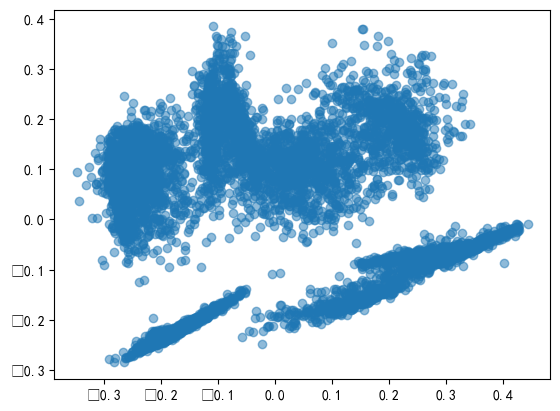

In [66]:
# transforming it into 2 dimensions and scattering
pca2=PCA(n_components=2)
trans_data=pca2.fit_transform(X)
fig,ax=plt.subplots()
fig.set_facecolor('w')
ax.scatter(trans_data[:,0],trans_data[:,1],alpha=0.5)

# model=dbscan_clst_plot2(eps=0.1,min_samples=50,trans_data=trans_data)

# 72.3% information are included
np.sum(pca2.explained_variance_ratio_)

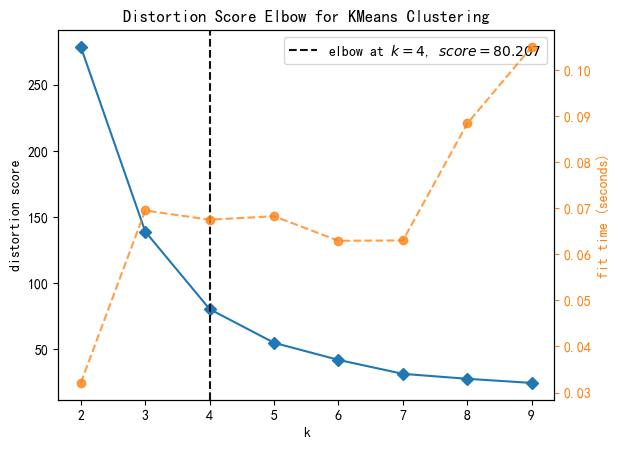

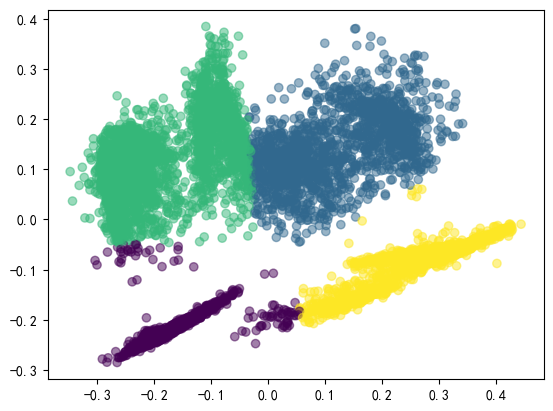

In [122]:
kmeans_model=kmeans_clst_plot2(trans_data)

In [83]:
ori_data=get_droped_data('CC GENERAL.csv')
ori_data
# show the result
ori_data['pca_label']=kmeans_model.labels_
ori_data.groupby('pca_label').describe()

BALANCE                                                  \
            count         mean          std       min         25%   
pca_label                                                           
0          1621.0  2735.719652  2462.684162  1.599053  969.139152   
1          2847.0  1082.869625  1671.832209  0.000000  124.533968   
2          2386.0  2312.187819  2244.179234  0.001146  858.152059   
3          1782.0   445.435835   974.333510  0.000000   22.168563   

                                                 BALANCE_FREQUENCY            \
                   50%          75%          max             count      mean   
pca_label                                                                      
0          1928.254972  3912.344717  16115.59640            1621.0  0.955081   
1           468.693449  1365.584206  19043.13856            2847.0  0.887763   
2          1543.783813  3013.588256  16304.88925            2386.0  0.912964   
3            66.457302   399.479565  11670.17985            1782.0  0.828027   

           ... PRC_FULL_PAYMENT       TENURE                                  \
           ...              75%  max   count       mean       std  min   25%   
pca_label  ...                                                                 
0          ...         0.000000  1.0  1621.0  11.470080  1.378360  6.0  12.0   
1          ...         0.333333  1.0  2847.0  11.735160  0.983045  6.0  12.0   
2          ...         0.000000  1.0  2386.0  11.344091  1.526633  6.0  12.0   
3          ...         0.636364  1.0  1782.0  11.526936  1.350070  6.0  12.0   

                             
            50%   75%   max  
pca_label                    
0          12.0  12.0  12.0  
1          12.0  12.0  12.0  
2          12.0  12.0  12.0  
3          12.0  12.0  12.0  

[4 rows x 104 columns]

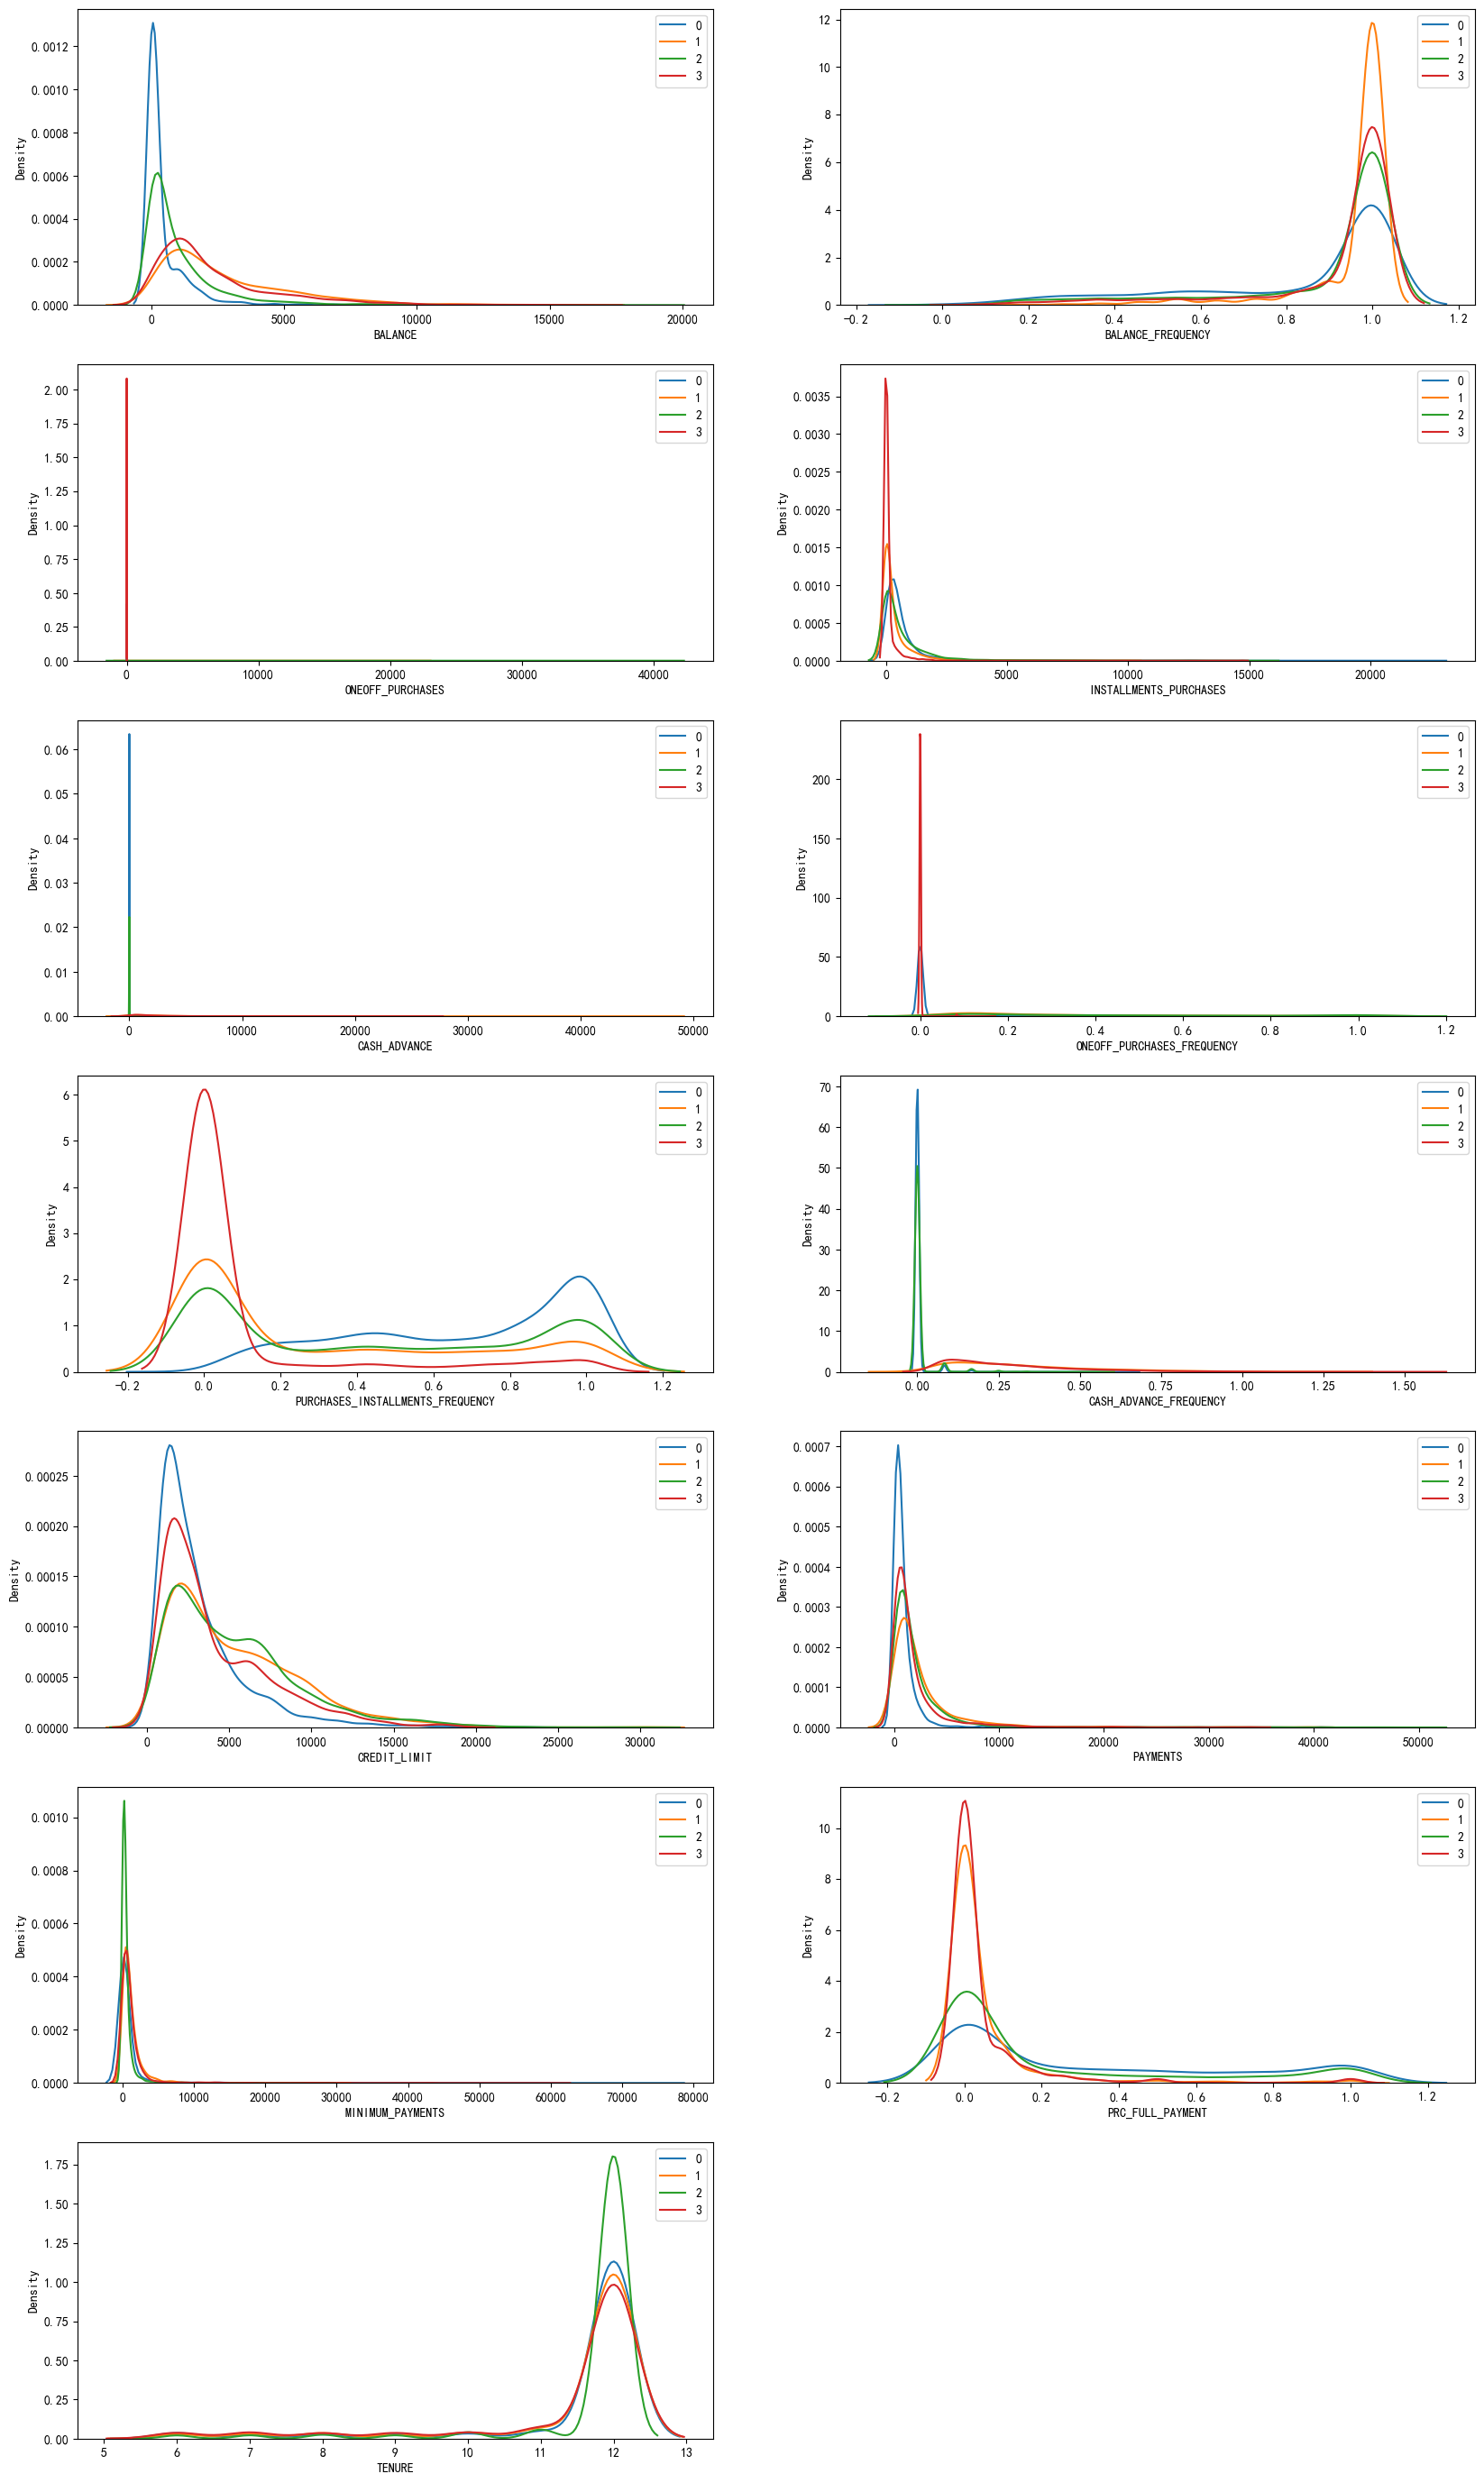

In [124]:
# 画每一feature的每个种类的概率密度图
ori_data=get_droped_data('CC GENERAL.csv')
ori_data['pca_label']=kmeans_model.labels_
plt.figure(figsize=(20,35))
for i,col in enumerate(data.columns):
    if col!='pca_label':
        kdes=[]
        for j,label in enumerate(set(kmeans_model.labels_)):
            # ax=axes[i,j]
            ax=plt.subplot(7,2,i+1)
            kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,col],ax=ax,label=label)
            plt.legend()

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1782.0,0.494315,4.156842,0.00,0.0000,0.00,0.0000,76.19
1,1616.0,825.629183,1403.533172,4.99,149.7875,389.33,1000.0000,22101.78
2,2852.0,1363.504597,2517.650887,6.90,246.2675,673.84,1516.1725,40761.25
3,2386.0,0.048650,0.900684,0.00,0.0000,0.00,0.0000,26.60


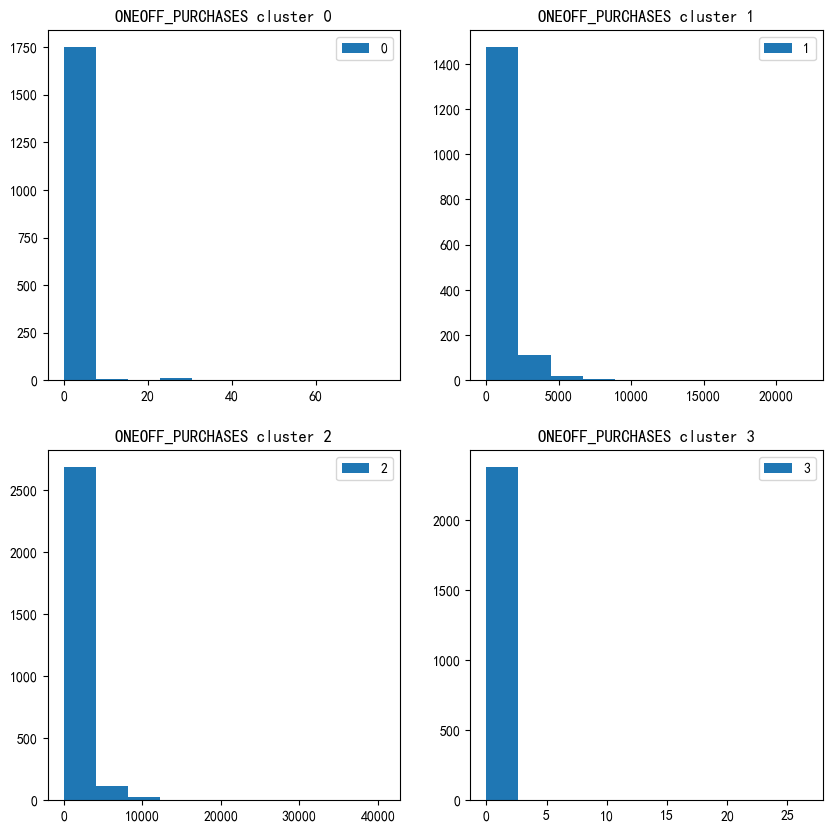

In [125]:
# ONEOFF_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(2,2,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],label=label)
        ax.set_title(f"ONEOFF_PURCHASES cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['ONEOFF_PURCHASES']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1782.0,575.788872,948.515272,0.0,171.015,347.625,639.6650,22500.00
1,1616.0,350.425928,744.560783,0.0,0.000,29.770,401.8375,10009.93
2,2852.0,642.405617,1172.020719,0.0,0.000,234.365,808.2175,15497.19
3,2386.0,87.979824,407.440384,0.0,0.000,0.000,0.0000,14686.10


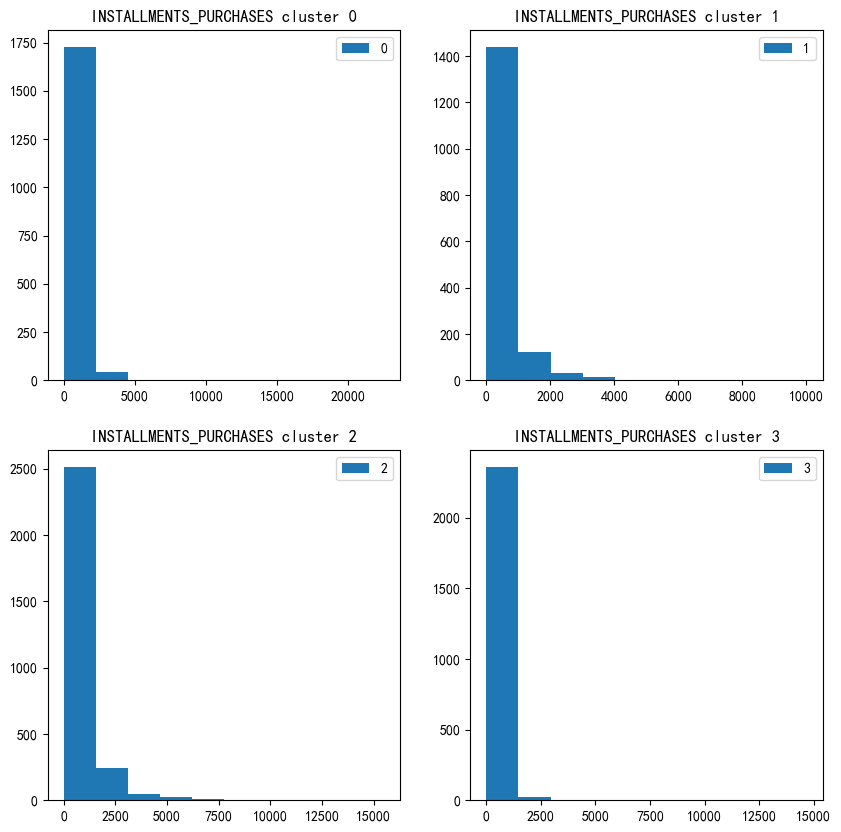

In [126]:
# INSTALLMENTS_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(2,2,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'INSTALLMENTS_PURCHASES'],label=label)
        ax.set_title(f"INSTALLMENTS_PURCHASES cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['INSTALLMENTS_PURCHASES']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1621.0,2228.914960,2942.373000,0.000000,478.678942,1347.900815,2881.905049,47137.211760
1,2847.0,14.469313,80.392782,0.000000,0.000000,0.000000,0.000000,1620.685551
2,2386.0,2064.139098,2518.986447,18.042768,441.094290,1263.450366,2772.407436,26194.049540
3,1782.0,3.590710,26.789997,0.000000,0.000000,0.000000,0.000000,440.972634


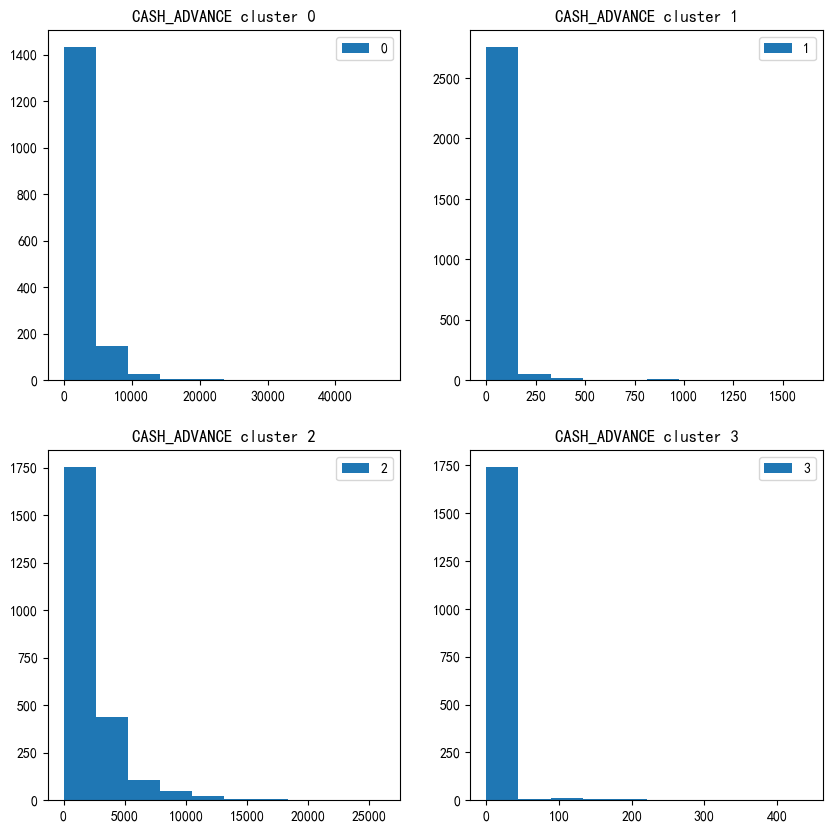

In [71]:
# hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        ax=plt.subplot(2,2,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'CASH_ADVANCE'],label=label)
        ax.set_title(f"CASH_ADVANCE cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['CASH_ADVANCE']


,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1621.0,5285.484269,3898.926993,200.0,2000.0,4000.0,7500.0,30000.0
1,2847.0,5261.897975,3938.140436,150.0,2000.0,4500.0,7325.0,30000.0
2,2386.0,4137.791790,3363.651689,50.0,1500.0,3000.0,6000.0,19000.0
3,1782.0,3160.276871,2774.876207,300.0,1300.0,2500.0,4000.0,23000.0


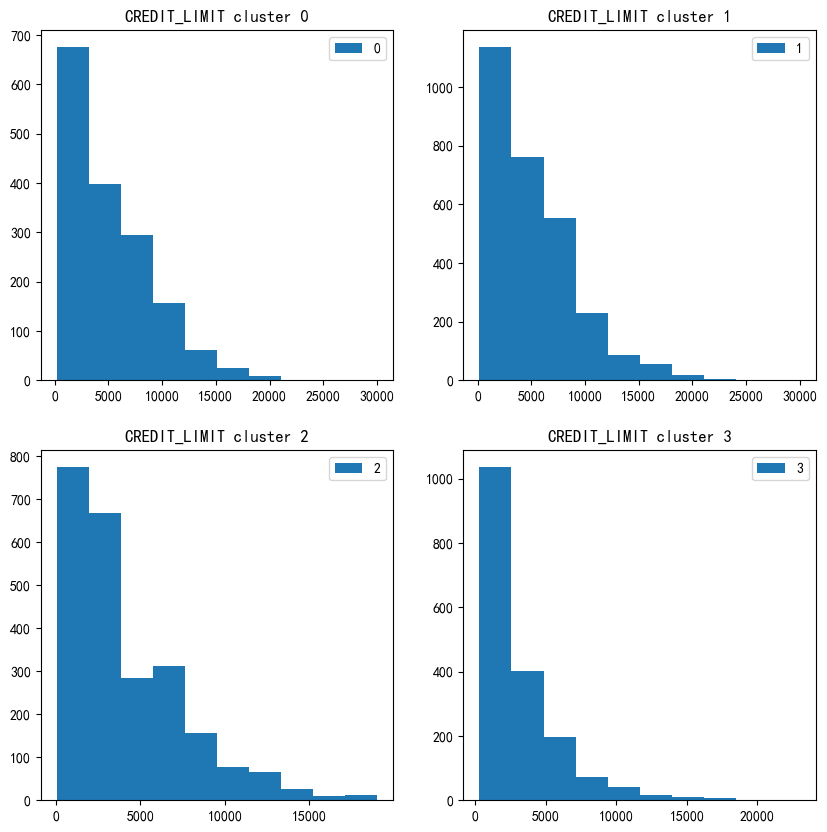

In [82]:
# hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        ax=plt.subplot(2,2,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'CREDIT_LIMIT'],label=label)
        ax.set_title(f"CREDIT_LIMIT cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['CREDIT_LIMIT']


,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1782.0,827.903308,1666.197698,0.056466,232.686943,455.409845,917.537103,40627.59524
1,1616.0,2512.207006,3558.308965,28.654864,633.859766,1422.571107,2925.178876,39461.96580
2,2852.0,1984.719218,3095.733871,4.523555,529.696921,1114.507323,2293.835662,50721.48336
3,2386.0,1766.673696,2731.550548,0.049513,424.141471,872.177721,1881.586730,34107.07499


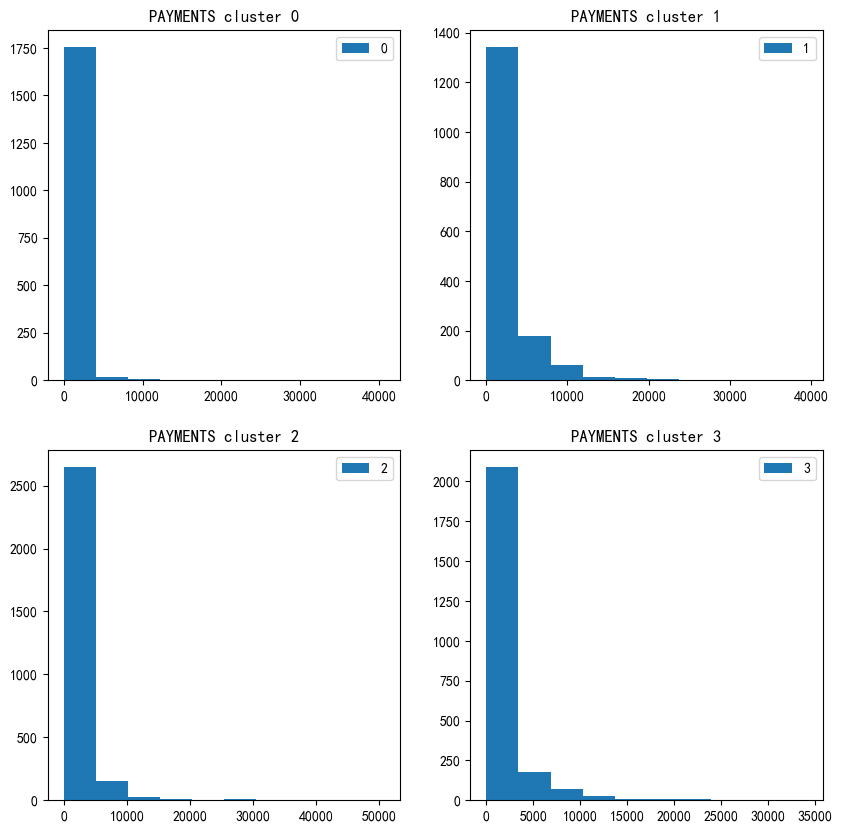

In [127]:
# hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        ax=plt.subplot(2,2,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'PAYMENTS'],label=label)
        ax.set_title(f"PAYMENTS cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['PAYMENTS']


In [81]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# t-SNE

d:\vscode\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\vscode\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


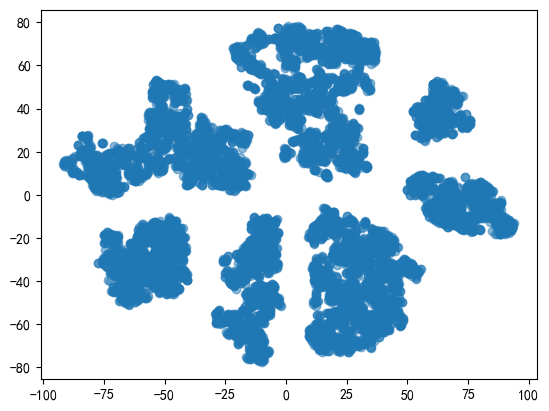

In [96]:
tsne_model=TSNE(n_components=2)
tsne_data=red_dim_plot2(tsne_model,X)


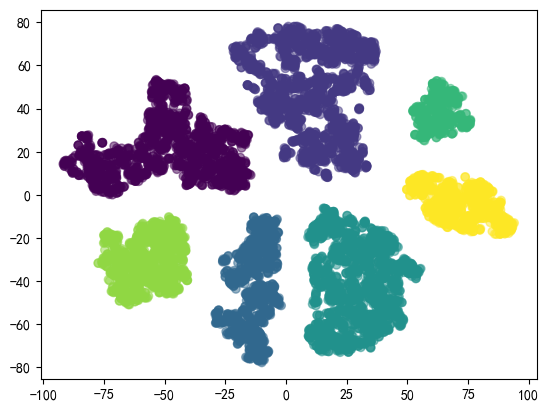

In [97]:
dbscan_model=dbscan_clst_plot2(eps=10,min_samples=50,trans_data= tsne_data)


d:\vscode\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
d:\vscode\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
d:\vscode\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
d:\vscode\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
d:\vscode\l

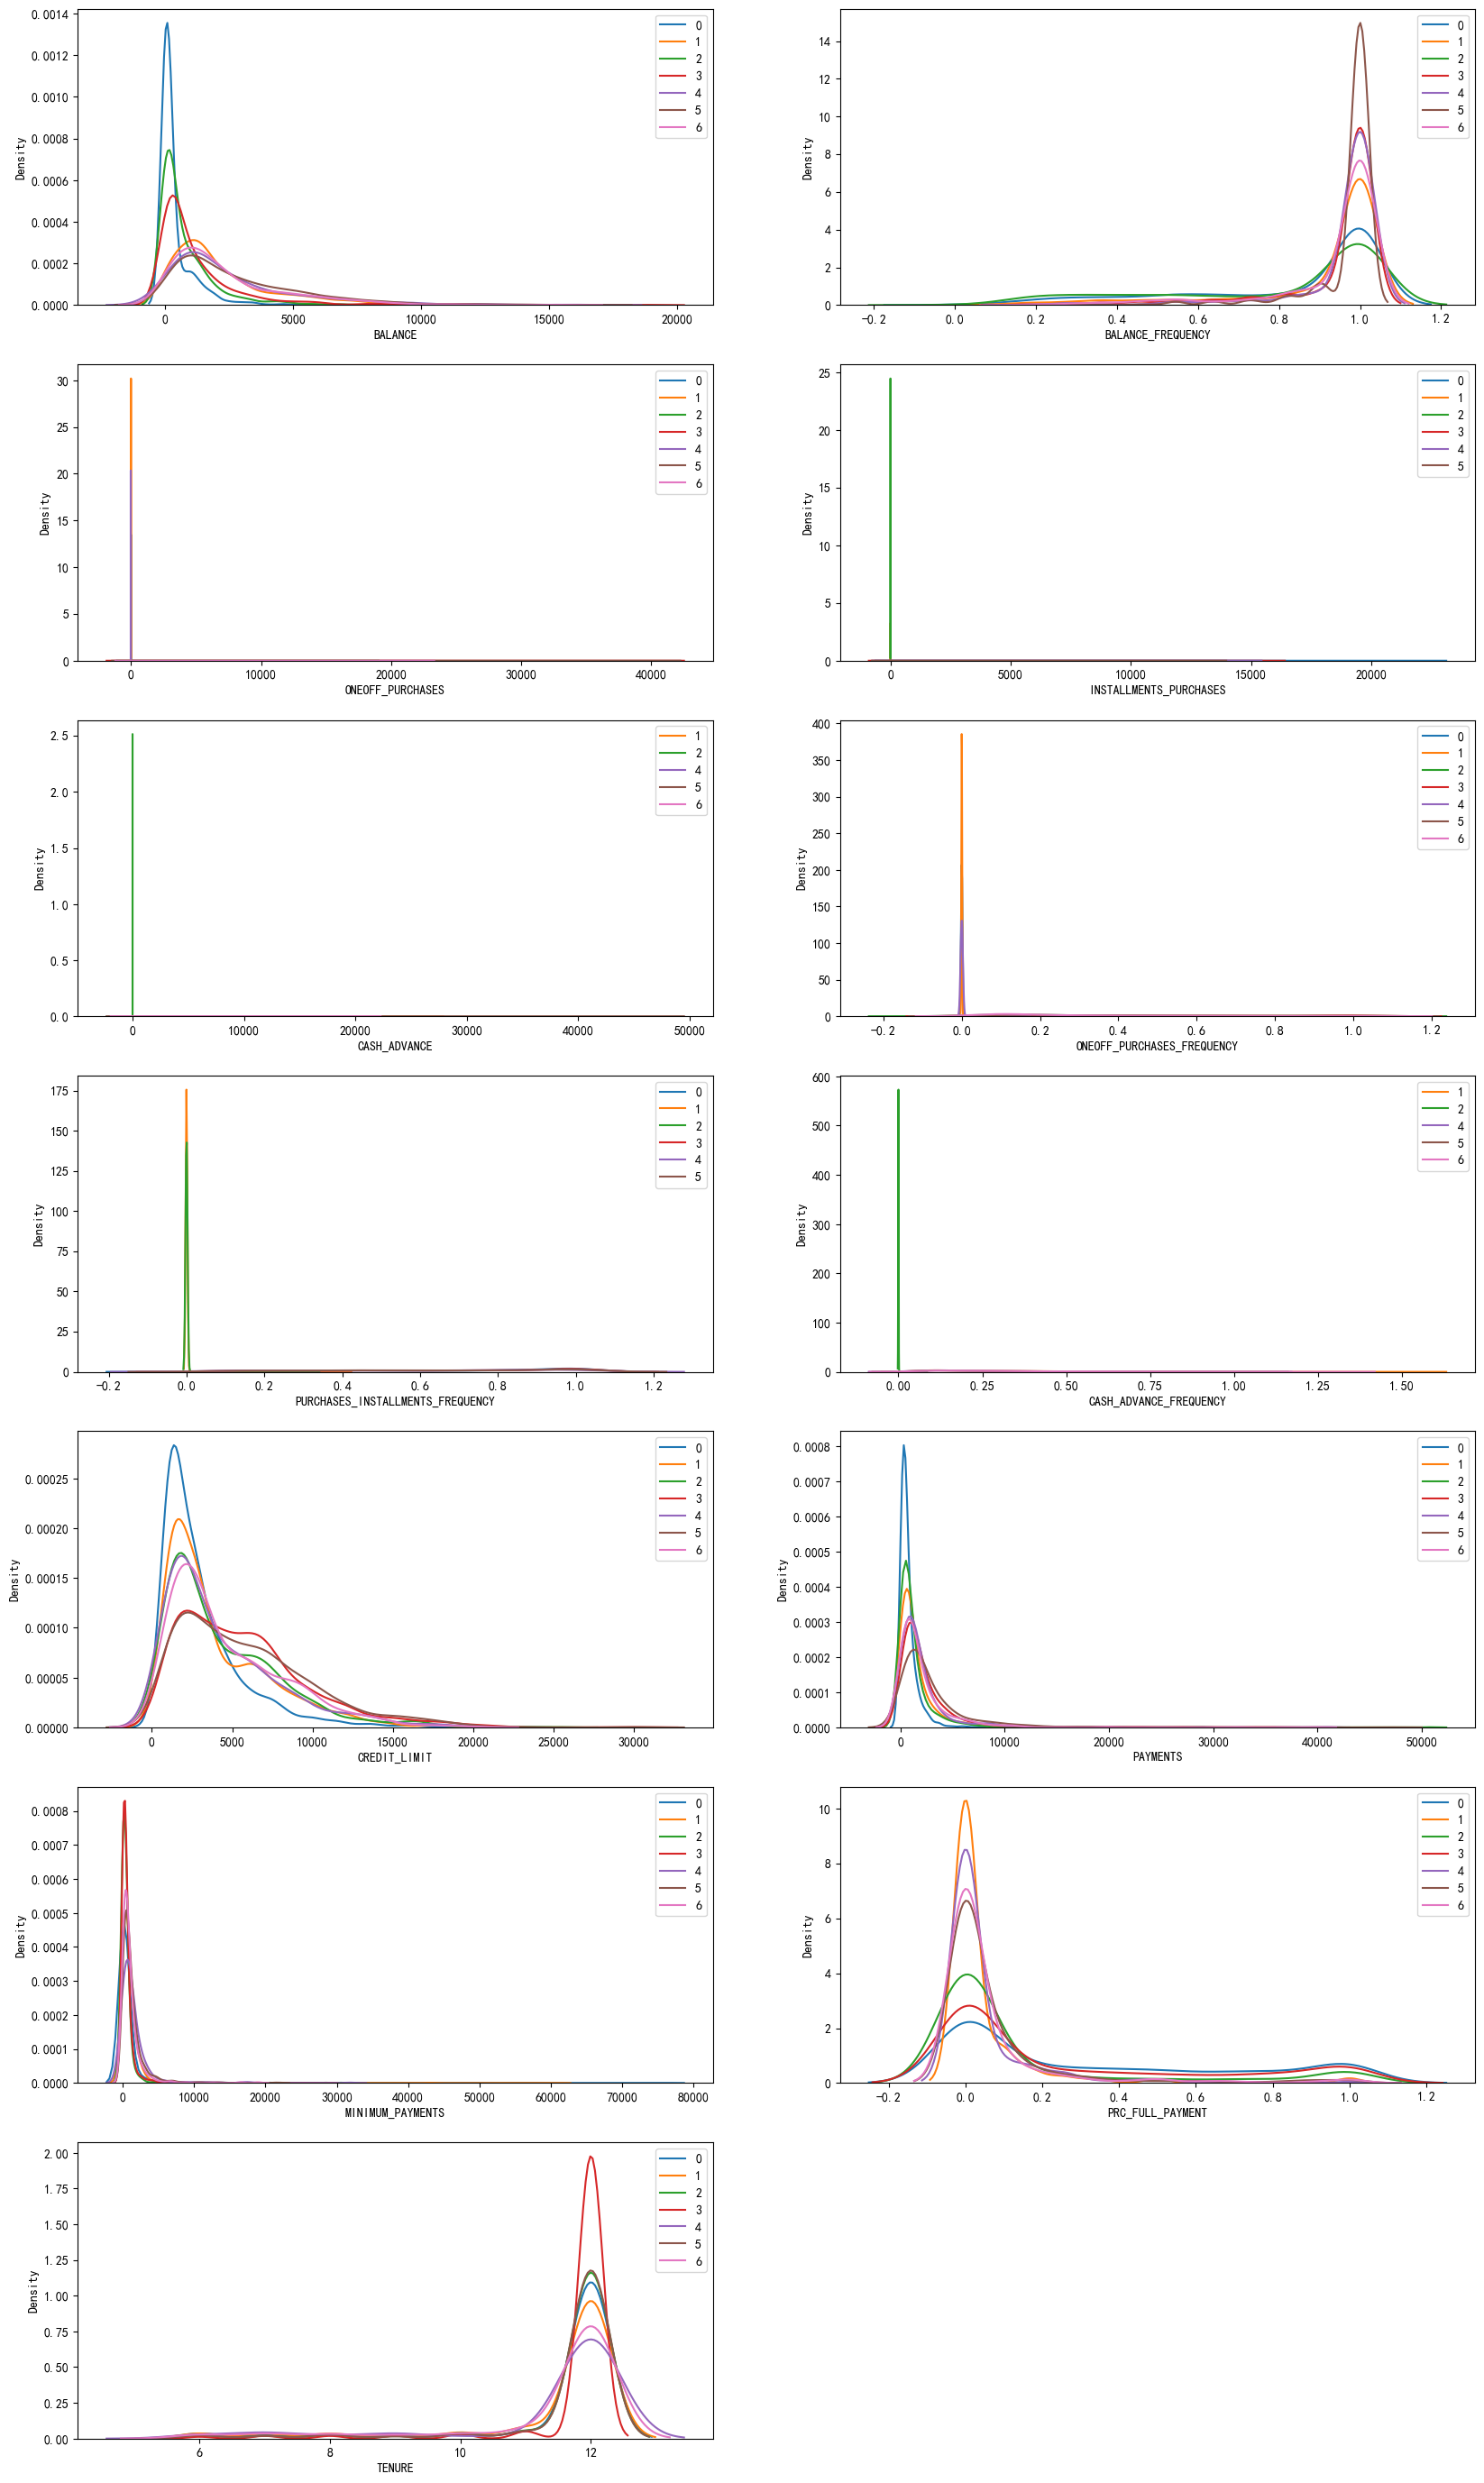

In [98]:
# 画每一feature的4个种类的概率密度图
ori_data['pca_label']=dbscan_model.labels_
plt.figure(figsize=(20,35))
for i,col in enumerate(data.columns):
    if col!='pca_label':
        kdes=[]
        for j,label in enumerate(set(dbscan_model.labels_)):
            # ax=axes[i,j]
            ax=plt.subplot(7,2,i+1)
            kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,col],ax=ax,label=label)
            plt.legend()

In [99]:
ori_data.groupby('pca_label').describe()
#TENURE 3中几乎都是12月，其余tenure差别不大

BALANCE                                                  \
            count         mean          std       min         25%   
pca_label                                                           
0          1698.0   419.958142   941.243330  0.000000   21.765719   
1          1973.0  2214.414443  2121.959835  0.001146  831.404268   
2          1007.0   788.867996  1197.262538  0.000000   54.122495   
3          1727.0  1223.967494  1821.155060  0.704307  169.075563   
4           457.0  2567.697247  2610.264582  1.097736  882.715792   
5          1004.0  2822.777248  2608.350155  2.299436  891.605396   
6           770.0  2377.093010  2289.132870  1.599053  859.057186   

                                                 BALANCE_FREQUENCY            \
                   50%          75%          max             count      mean   
pca_label                                                                      
0            62.615831   340.776525  11670.17985            1698.0  0.823472   
1          1509.177493  2885.068871  14581.45914            1973.0  0.903707   
2           287.493279  1111.850419  12323.84536            1007.0  0.792221   
3           536.104848  1518.576765  19043.13856            1727.0  0.938184   
4          1630.991993  3341.352075  16304.88925             457.0  0.957362   
5          2003.855857  4005.732719  16259.44857            1004.0  0.969882   
6          1625.825247  3154.941241  15258.22590             770.0  0.933723   

           ... PRC_FULL_PAYMENT       TENURE                                  \
           ...              75%  max   count       mean       std  min   25%   
pca_label  ...                                                                 
0          ...         0.666667  1.0  1698.0  11.507067  1.372431  6.0  12.0   
1          ...         0.000000  1.0  1973.0  11.360872  1.495609  6.0  12.0   
2          ...         0.090909  1.0  1007.0  11.609732  1.187084  6.0  12.0   
3          ...         0.500000  1.0  1727.0  11.806601  0.832218  6.0  12.0   
4          ...         0.000000  1.0   457.0  11.321663  1.617961  6.0  12.0   
5          ...         0.083333  1.0  1004.0  11.622510  1.179727  6.0  12.0   
6          ...         0.000000  1.0   770.0  11.341558  1.521057  6.0  12.0   

                             
            50%   75%   max  
pca_label                    
0          12.0  12.0  12.0  
1          12.0  12.0  12.0  
2          12.0  12.0  12.0  
3          12.0  12.0  12.0  
4          12.0  12.0  12.0  
5          12.0  12.0  12.0  
6          12.0  12.0  12.0  

[7 rows x 104 columns]

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1698.0,556.144564,910.034184,0.00,167.4475,339.72,624.270,22500.00
1,1973.0,0.017957,0.511317,0.00,0.0000,0.00,0.000,18.35
2,1007.0,0.001936,0.061450,0.00,0.0000,0.00,0.000,1.95
3,1727.0,964.072646,1342.162976,6.33,229.2950,545.85,1176.335,15497.19
4,457.0,542.648665,850.049635,7.26,160.8000,342.65,650.040,14686.10
5,1004.0,773.994024,1039.599645,9.65,185.3350,447.23,1019.610,13184.43
6,770.0,0.000000,0.000000,0.00,0.0000,0.00,0.000,0.00


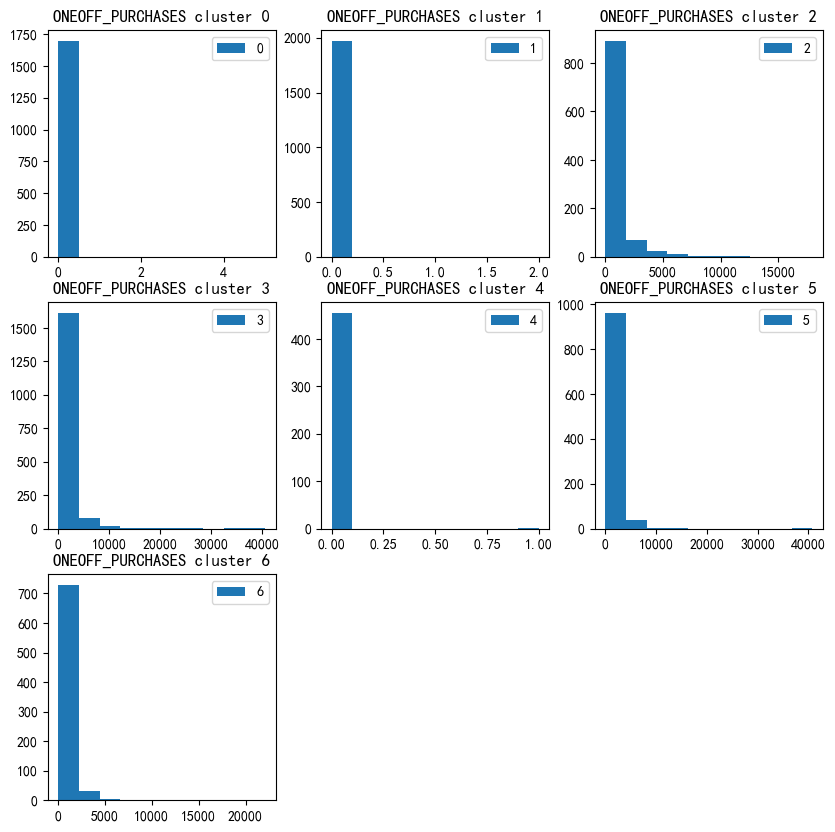

In [101]:
# ONEOFF_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(dbscan_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(3,3,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],label=label)
        ax.set_title(f"ONEOFF_PURCHASES cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['INSTALLMENTS_PURCHASES']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1698.0,556.144564,910.034184,0.00,167.4475,339.72,624.270,22500.00
1,1973.0,0.017957,0.511317,0.00,0.0000,0.00,0.000,18.35
2,1007.0,0.001936,0.061450,0.00,0.0000,0.00,0.000,1.95
3,1727.0,964.072646,1342.162976,6.33,229.2950,545.85,1176.335,15497.19
4,457.0,542.648665,850.049635,7.26,160.8000,342.65,650.040,14686.10
5,1004.0,773.994024,1039.599645,9.65,185.3350,447.23,1019.610,13184.43
6,770.0,0.000000,0.000000,0.00,0.0000,0.00,0.000,0.00


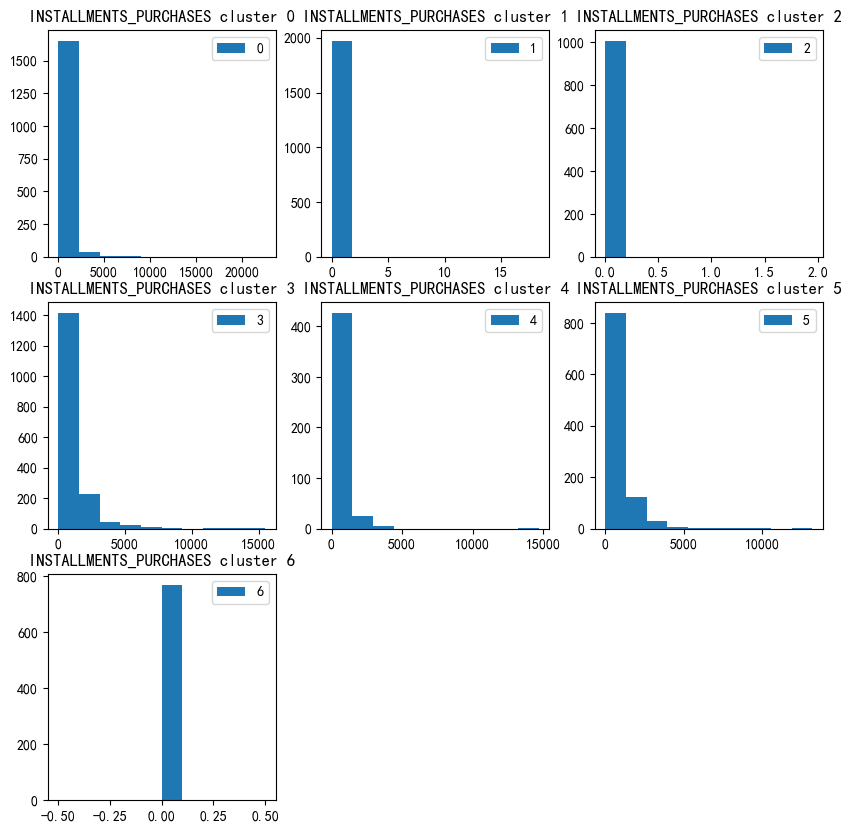

In [102]:
# INSTALLMENTS_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(dbscan_model.labels_)):
        ax=plt.subplot(3,3,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'INSTALLMENTS_PURCHASES'],label=label)
        ax.set_title(f"INSTALLMENTS_PURCHASES cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['INSTALLMENTS_PURCHASES']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1698.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1973.0,2029.396915,2547.998282,18.042768,381.541722,1235.769004,2732.692813,26194.049540
2,1007.0,0.018853,0.598271,0.000000,0.000000,0.000000,0.000000,18.985087
3,1727.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,457.0,1986.648469,2336.983553,18.531069,491.329785,1120.449630,2642.846513,17661.494860
5,1004.0,2090.814775,3117.372266,14.222216,399.128295,1116.127769,2646.855311,47137.211760
6,770.0,2044.940693,2503.441272,18.280043,365.839187,1160.371480,2762.421067,20277.331120


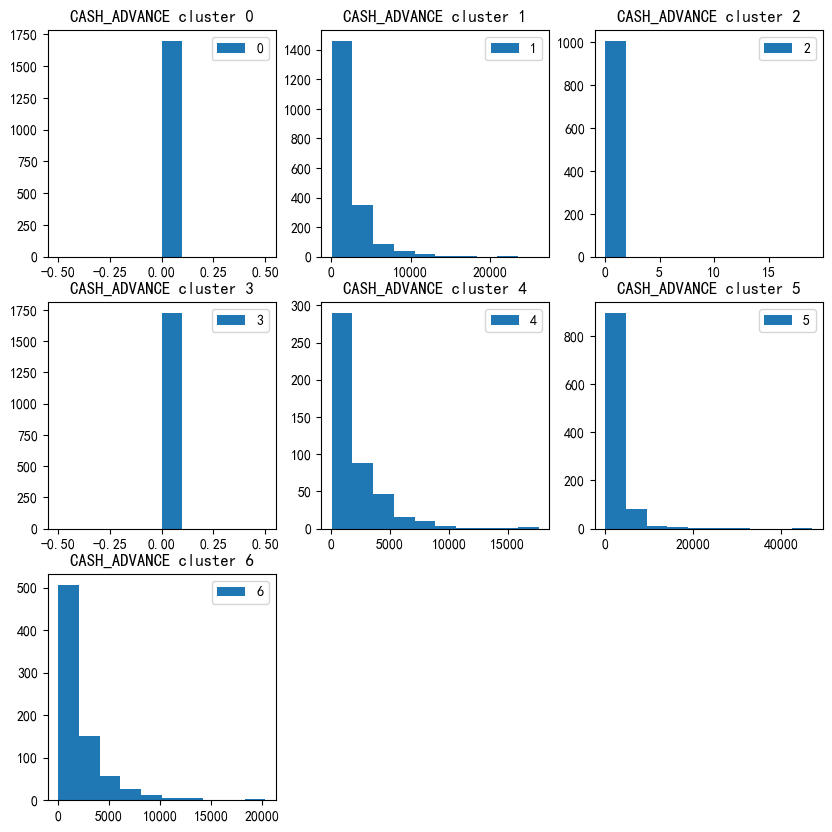

In [103]:
# CASH_ADVANCE hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(dbscan_model.labels_)):
        ax=plt.subplot(3,3,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'CASH_ADVANCE'],label=label)
        ax.set_title(f"CASH_ADVANCE cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['CASH_ADVANCE']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1698.0,3120.738153,2733.078738,300.0,1262.5,2500.0,4000.0,23000.0
1,1973.0,4065.999324,3305.726745,50.0,1500.0,3000.0,6000.0,19000.0
2,1007.0,4426.922151,3608.761548,150.0,1600.0,3000.0,6500.0,25000.0
3,1727.0,5716.214139,4015.442734,300.0,2500.0,5000.0,7500.0,30000.0
4,457.0,4307.002188,3528.528032,500.0,1500.0,3000.0,6000.0,19000.0
5,1004.0,5823.517043,4145.546055,300.0,2500.0,5000.0,8000.0,30000.0
6,770.0,4657.953955,3533.094290,200.0,2000.0,3500.0,6500.0,20000.0


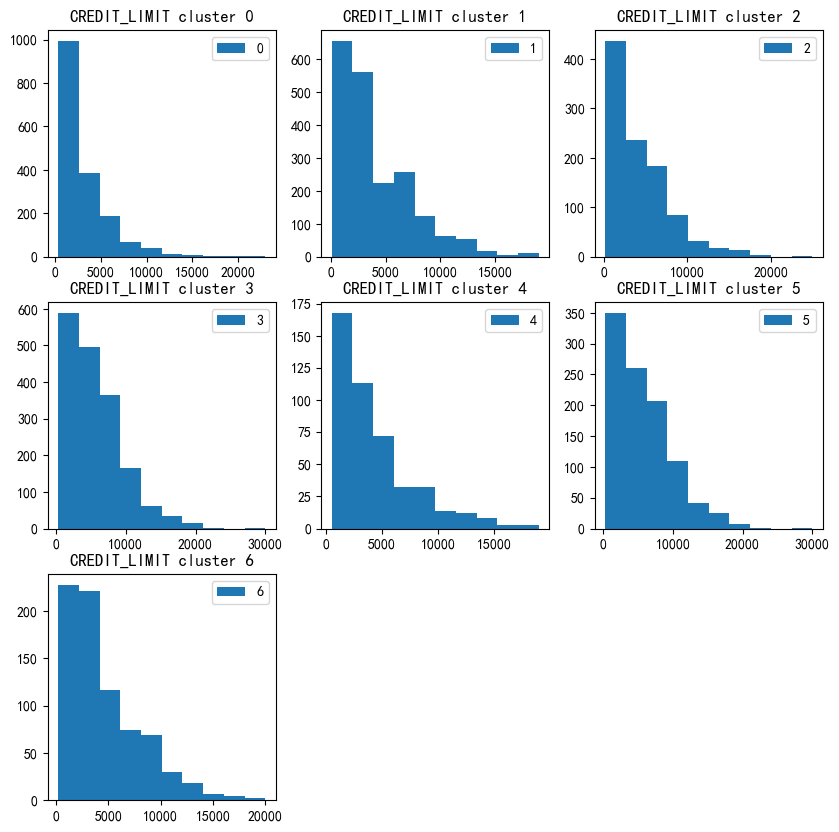

In [104]:
# CREDIT_LIMIT hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(dbscan_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(3,3,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'CREDIT_LIMIT'],label=label)
        ax.set_title(f"CREDIT_LIMIT cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['CREDIT_LIMIT']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,1698.0,787.070418,1360.726599,4.841543,229.408107,443.805390,886.286370,28988.97388
1,1973.0,1739.980420,2826.379072,0.049513,396.836709,805.264643,1786.142816,34107.07499
2,1007.0,1213.911105,2179.056817,0.056466,314.450184,610.426020,1379.589837,50721.48336
3,1727.0,2307.018898,3262.122749,18.125527,707.434913,1350.435597,2610.700552,36066.75068
4,457.0,1858.984657,2753.064479,32.924384,578.744266,1133.806322,2036.371171,40627.59524
5,1004.0,3045.866879,4096.300914,48.594194,890.920049,1761.721359,3570.875073,46930.59824
6,770.0,1983.233081,2943.811412,28.654864,513.202805,1146.380005,2258.622582,39461.96580


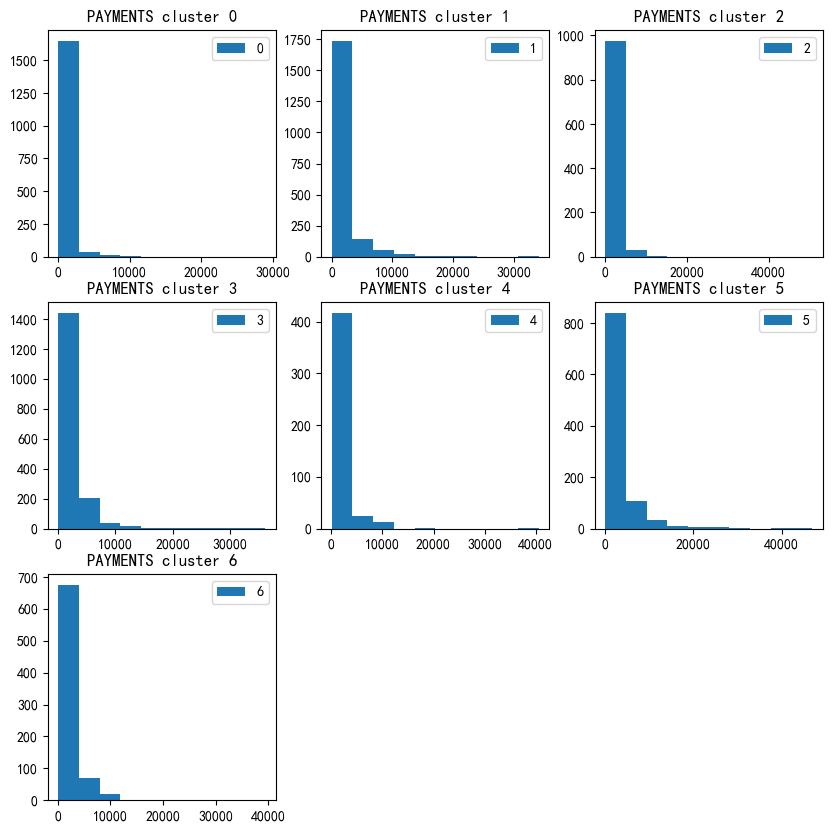

In [105]:
# PAYMENTS hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(dbscan_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(3,3,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'PAYMENTS'],label=label)
        ax.set_title(f"PAYMENTS cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['PAYMENTS']

# Spectral Embedding

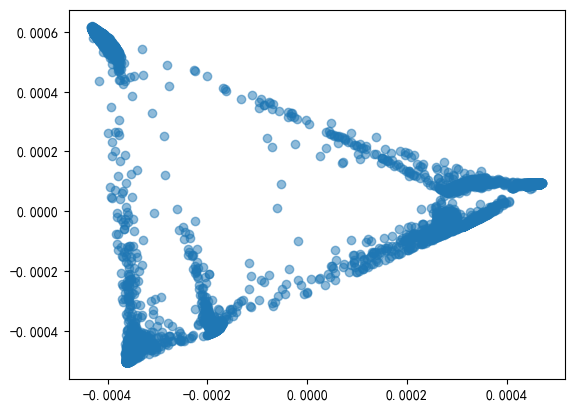

In [106]:
from sklearn.manifold import SpectralEmbedding

SE=SpectralEmbedding(n_components=2)

se_transdata=red_dim_plot2(SE,data)


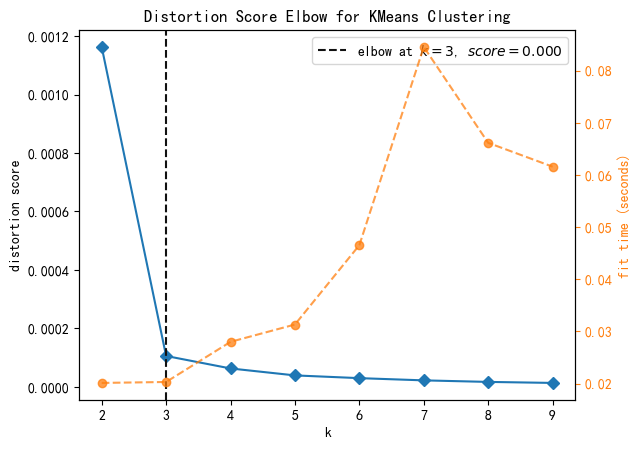

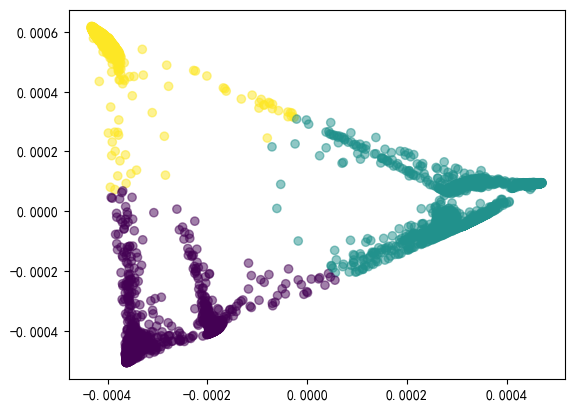

In [112]:
kmeans_model2=kmeans_clst_plot2(se_transdata)

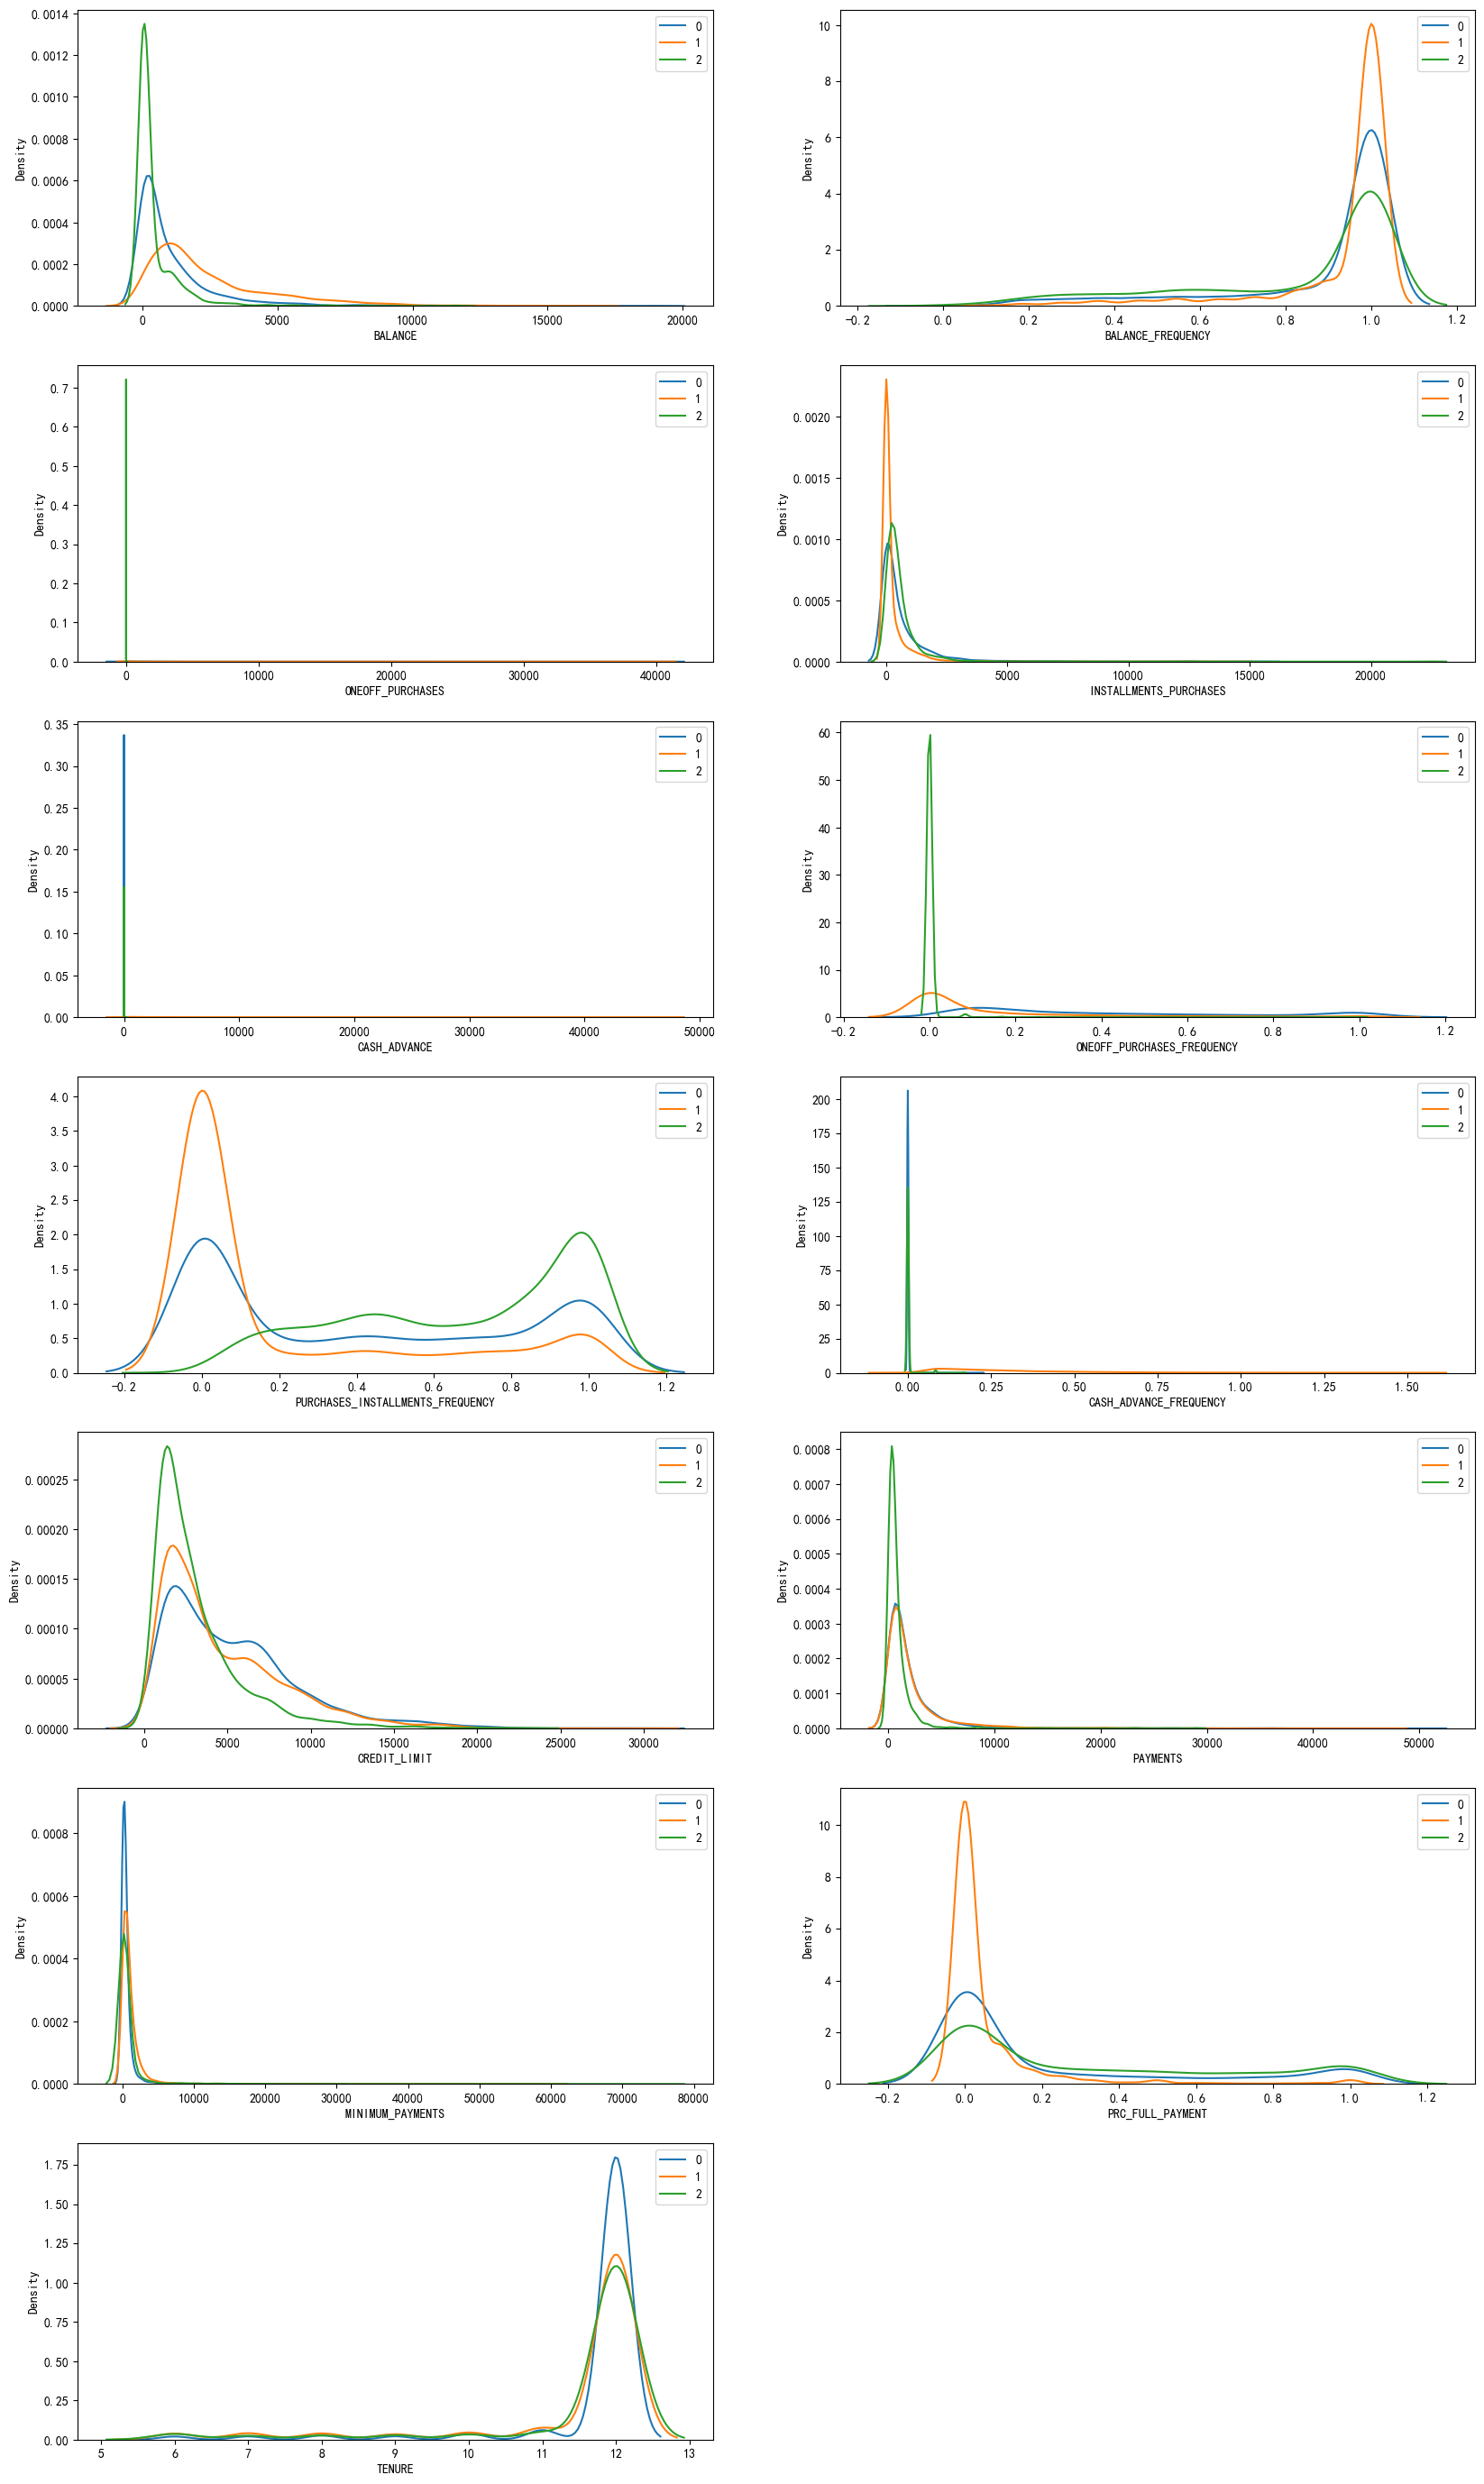

In [129]:
# 画每一feature的4个种类的概率密度图
ori_data['pca_label']=kmeans_model2.labels_
plt.figure(figsize=(20,35))
for i,col in enumerate(data.columns):
    if col!='pca_label':
        kdes=[]
        for j,label in enumerate(set(kmeans_model2.labels_)):
            ax=plt.subplot(7,2,i+1)
            kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,col],ax=ax,label=label)
            plt.legend()

In [130]:
ori_data.groupby('pca_label').describe()

BALANCE                                                  \
            count         mean          std       min         25%   
pca_label                                                           
0          2741.0  1064.894938  1631.845020  0.000000  117.205812   
1          4151.0  2449.857244  2347.398595  0.001146  869.515633   
2          1744.0   424.279661   946.701847  0.000000   21.677163   

                                                 BALANCE_FREQUENCY            \
                   50%          75%          max             count      mean   
pca_label                                                                      
0           451.231060  1355.180523  19043.13856            2741.0  0.885263   
1          1641.801417  3294.665281  16304.88925            4151.0  0.931638   
2            62.615831   345.029059  11670.17985            1744.0  0.823272   

           ... PRC_FULL_PAYMENT       TENURE                                  \
           ...              75%  max   count       mean       std  min   25%   
pca_label  ...                                                                 
0          ...         0.333333  1.0  2741.0  11.735863  0.977253  6.0  12.0   
1          ...         0.000000  1.0  4151.0  11.410744  1.454919  6.0  12.0   
2          ...         0.636364  1.0  1744.0  11.512041  1.368389  6.0  12.0   

                             
            50%   75%   max  
pca_label                    
0          12.0  12.0  12.0  
1          12.0  12.0  12.0  
2          12.0  12.0  12.0  

[3 rows x 104 columns]

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,2741.0,1298.972353,2400.118469,4.99,221.48,640.5,1440.480,40624.06
1,4151.0,400.639937,1259.308150,0.00,0.00,0.0,310.445,40761.25
2,1744.0,0.223177,2.426717,0.00,0.00,0.0,0.000,38.40


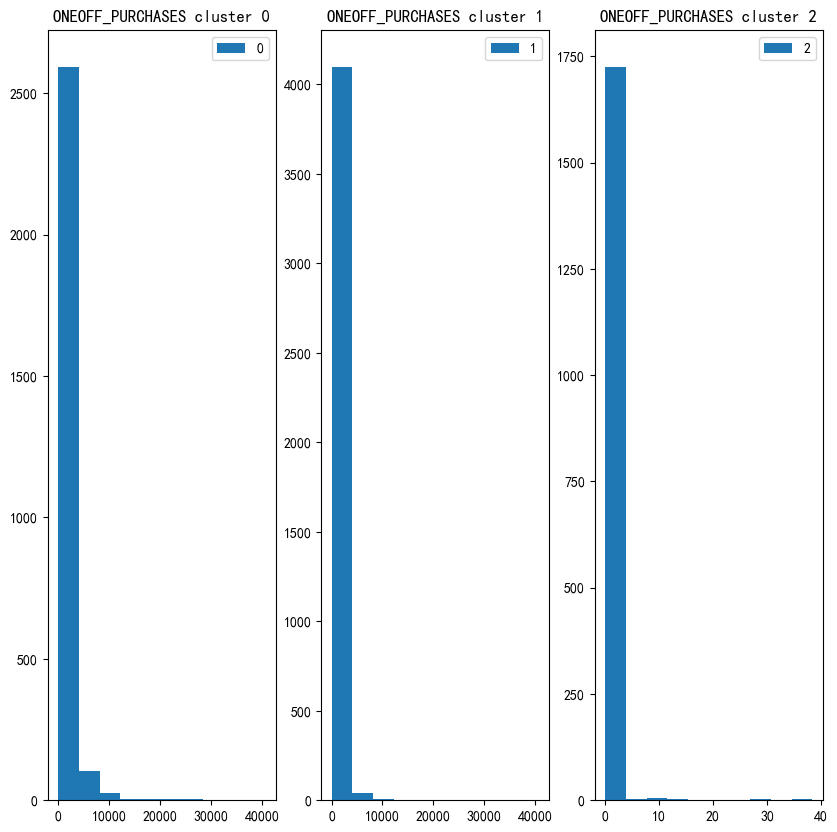

In [131]:
#ONEOFF_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model2.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(1,3,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],label=label)
        ax.set_title(f"ONEOFF_PURCHASES cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['ONEOFF_PURCHASES']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,2741.0,0.398193,5.288607,0.0,0.000000,0.000000,0.000000,181.491612
1,4151.0,2067.612972,2673.039219,0.0,418.304925,1201.188255,2733.434769,47137.211760
2,1744.0,1.116355,11.236820,0.0,0.000000,0.000000,0.000000,197.377800


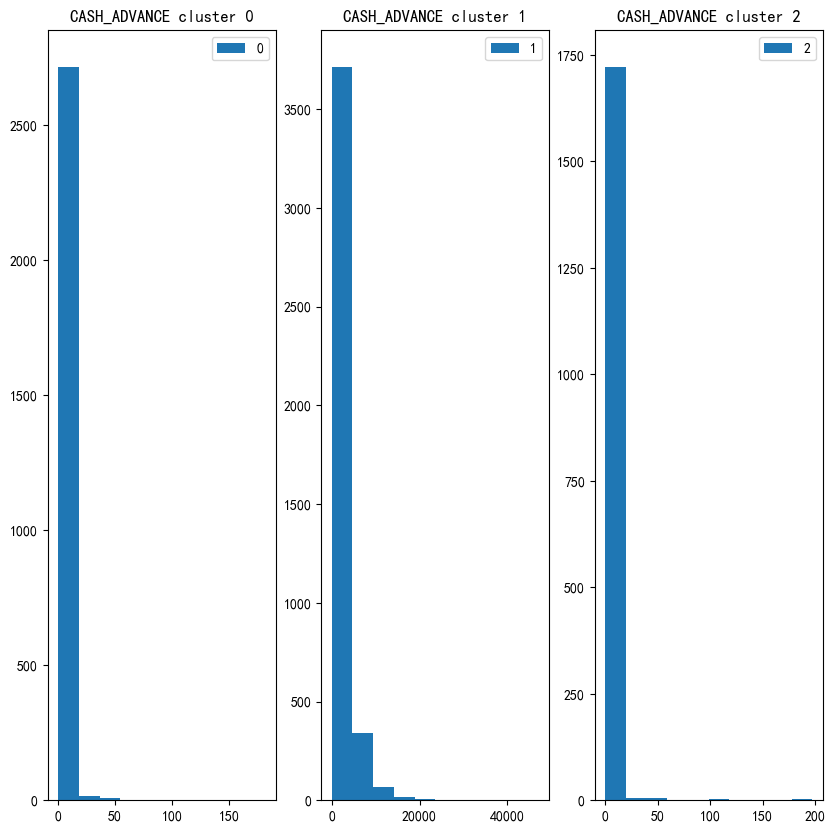

In [132]:
#CASH_ADVANCE hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model2.labels_)):
        ax=plt.subplot(1,3,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'CASH_ADVANCE'],label=label)
        ax.set_title(f"CASH_ADVANCE cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['CASH_ADVANCE']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,2741.0,1910.393755,2953.736364,14.500688,514.650308,1068.304454,2209.410409,50721.48336
1,4151.0,2120.947983,3248.411230,0.049513,514.462454,1113.279765,2318.133416,46930.59824
2,1744.0,785.727355,1347.025564,0.056466,229.471584,445.608064,887.813696,28988.97388


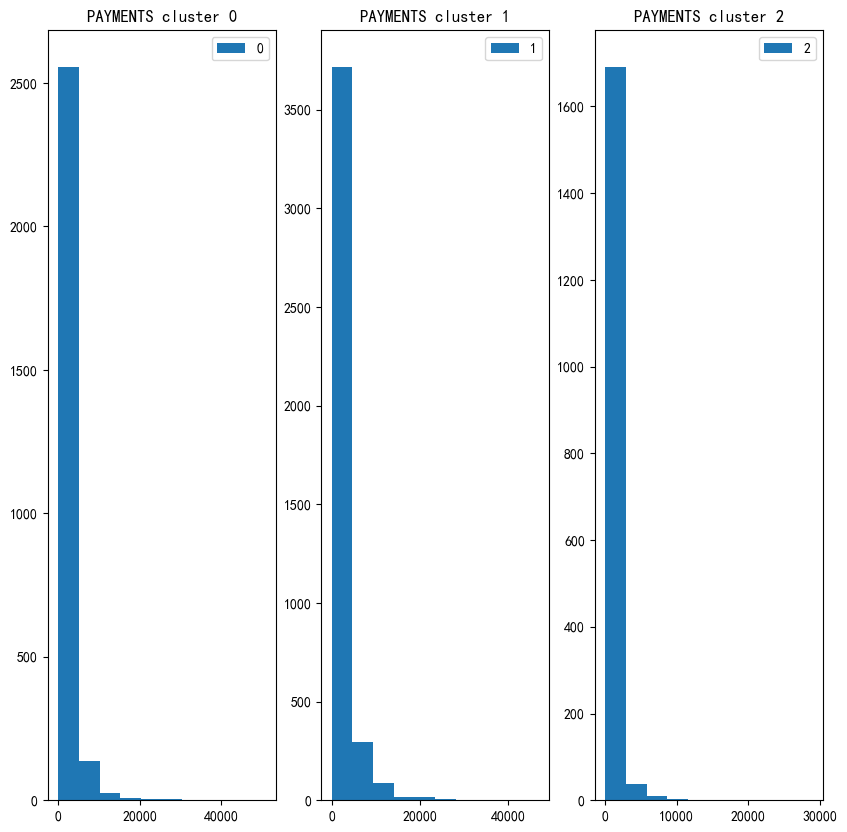

In [133]:
#PAYMENTS hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model2.labels_)):
        ax=plt.subplot(1,3,j+1)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'PAYMENTS'],label=label)
        ax.set_title(f"PAYMENTS cluster {label}")
        plt.legend()
ori_data.groupby('pca_label').describe()['PAYMENTS']